## How did Facebook users react towards the political situation in Myanmar in 2022?

Myanmar 2019-2023

In [ ]:
# Import the packages we'll need
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy  as np
import matplotlib.dates as mdates
import seaborn as sns

#NLP
import wordninja
import spacy
from spacy.symbols import nsubj, VERB
nlp = spacy.load("en_core_web_sm")

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()

import string

#Clustering
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import cluster
from kneed import KneeLocator

#LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim import corpora, models
from gensim.models import Phrases
from gensim.corpora import Dictionary


[nltk_data] Downloading package stopwords to /Users/paula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/paula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/paula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
m = pd.read_csv('MyanmarFB20231209.csv')

/var/folders/j8/qq358xrs1pd71q167r63w1zc0000gn/T/ipykernel_28916/4085186666.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv('MyanmarFB20231209.csv')


In [ ]:
m

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,brandedContentSponsor.url,brandedContentSponsor.platform,brandedContentSponsor.platformId,brandedContentSponsor.accountType,brandedContentSponsor.pageAdminTopCountry,brandedContentSponsor.pageDescription,brandedContentSponsor.pageCreatedDate,brandedContentSponsor.pageCategory,brandedContentSponsor.verified,year
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74693,100064466781570_580849920740562,Facebook,NaN,2023-04-19 16:57:31,photo,ဆံပင်ရှည်လေးနဲ့ နန်းဆန်ဖို့ ဒီလိုhairclipတစ်ခု...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=580849...,https://www.facebook.com/100064466781570/posts...,459962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74694,427815888197211_1136924793952980,Facebook,NaN,2023-07-07 12:24:15,photo,NaN,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=832590...,https://www.facebook.com/groups/42781588819721...,140083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74695,1976658185917649_3349022042014583,Facebook,NaN,2023-02-21 07:05:30,photo,🦤🤦‍♀️ ဘဲ ရှိလား ဆိုပြီး လာလာ 🦤🙍‍♀️ လှောင်နေတဲ့...,"[{'original': 'http://www.migoomm.com', 'expan...",https://www.facebook.com/MigooShoppingMyanmar/...,https://www.facebook.com/1976658185917649/post...,45108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74696,100077569562328_227750839820567,Facebook,NaN,2023-04-09 17:11:11,photo,🍀Green Stone Realty ရဲ့ စိမ်းလန်းသာယာ ကျယ်ပြော...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=227750...,https://www.facebook.com/100077569562328/posts...,27478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Text preprocessing

We will take the 2022 posts because there are significantly more than in the other years

In [ ]:
# Filter rows where 'date' is not NaN and starts with the year we want
matches_2019 = m[m['date'].notna() & m['date'].str.startswith("2019")]
matches_2020 = m[m['date'].notna() & m['date'].str.startswith("2020")]
matches_2021 = m[m['date'].notna() & m['date'].str.startswith("2021")]
matches_2022 = m[m['date'].notna() & m['date'].str.startswith("2022")]
matches_2023 = m[m['date'].notna() & m['date'].str.startswith("2023")]


# Count number of rows that match the condition
num_matches2019 = len(matches_2019)
num_matches2020= len(matches_2020)
num_matches2021 = len(matches_2021)
num_matches2022 = len(matches_2022)
num_matches2023 = len(matches_2023)

print(num_matches2019)
print(num_matches2020)
print(num_matches2021)
print(num_matches2022)
print(num_matches2023)

1215
1223
1224
56486
1215


In [ ]:
matches_2022

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,brandedContentSponsor.url,brandedContentSponsor.platform,brandedContentSponsor.platformId,brandedContentSponsor.accountType,brandedContentSponsor.pageAdminTopCountry,brandedContentSponsor.pageDescription,brandedContentSponsor.pageCreatedDate,brandedContentSponsor.pageCategory,brandedContentSponsor.verified,year
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58881,246206749148701_1364210074015024,Facebook,2022-01-17 05:00:00,2023-08-06 16:32:48,link,Darting between flowers in gardens of tropical...,[{'original': 'https://ilikethis.netlify.app/....,https://ilikethis.netlify.app/.netlify/functio...,https://www.facebook.com/246206749148701/posts...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58883,246206749148701_1369085943527437,Facebook,2022-01-25 03:00:07,2023-08-06 16:32:46,link,Darting between flowers in gardens of tropical...,[{'original': 'https://ilikethis.netlify.app/....,https://ilikethis.netlify.app/.netlify/functio...,https://www.facebook.com/246206749148701/posts...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58884,105263504913820_293710506069118,Facebook,2022-01-18 17:30:00,2022-03-11 05:21:22,native_video,#Myanmar workers held in prisons express their...,[{'original': 'https://www.facebook.com/a24naA...,https://www.facebook.com/a24naAsia/videos/6366...,https://www.facebook.com/105263504913820/posts...,16229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58886,360730665151210_638196434071297,Facebook,2022-01-20 22:26:37,2023-09-30 15:59:02,status,Where 😊😊😊are you from? 🇦🇫 Afghanistan 🇦🇱Albani...,NaN,NaN,https://www.facebook.com/groups/36073066515121...,129488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we want to take the posts that are written in English

In [ ]:
# Filter rows where 'languageCode' is equal to 'en' and we also drop the duplicates, it can be that one post is appearing more than once
df = matches_2022[(matches_2022['languageCode'] == 'en')]
df = df.drop_duplicates(subset='message', keep='first')
df

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,brandedContentSponsor.url,brandedContentSponsor.platform,brandedContentSponsor.platformId,brandedContentSponsor.accountType,brandedContentSponsor.pageAdminTopCountry,brandedContentSponsor.pageDescription,brandedContentSponsor.pageCreatedDate,brandedContentSponsor.pageCategory,brandedContentSponsor.verified,year
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56473,1625061897787696_2831378810489326,Facebook,2022-04-10 04:26:48,2022-05-02 07:22:55,status,"APRIL 8, 2022 Why Ukraine? BY RICHARD FALK, HT...",[{'original': 'HTTPS://WWW.COUNTERPUNCH.ORG/20...,NaN,https://www.facebook.com/1625061897787696/post...,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
56474,100064679767236_418153727017283,Facebook,2022-07-26 02:29:41,2022-10-24 00:05:08,status,Statement attributable to the Spokesperson for...,NaN,NaN,https://www.facebook.com/100064679767236/posts...,2907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
56478,1658816550905585_5006093266177880,Facebook,2022-04-20 02:09:33,2022-05-10 10:42:15,link,Today we are honored to have Assoc. Prof. Dr [...,[{'original': 'https://www.facebook.com/kranth...,https://www.facebook.com/events/444857964065253/,https://www.facebook.com/groups/16588165509055...,2712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
58884,105263504913820_293710506069118,Facebook,2022-01-18 17:30:00,2022-03-11 05:21:22,native_video,#Myanmar workers held in prisons express their...,[{'original': 'https://www.facebook.com/a24naA...,https://www.facebook.com/a24naAsia/videos/6366...,https://www.facebook.com/105263504913820/posts...,16229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we can start with the text cleaning:

In [ ]:
df['message'] = df['message'].astype(str)

# Function for basic cleaning including hashtag splitting
def basic_clean(x):
    # Remove URLs
    x = re.sub(r'http\S+', '', x, flags=re.IGNORECASE)

    # Remove mentions
    x = re.sub(r'@\w+', '', x)

    return x

def split_hashtags(x):
    # Split words only for hashtags
    split_words = [wordninja.split('#' + word) if word.startswith('#') else [word] for word in x.split()]

    # Flatten the list of lists into a single list of words
    split_words = [item for sublist in split_words for item in sublist]

    # Join the words back into a string
    result = ' '.join(split_words)

    return result


# Apply basic cleaning
df['text_basic'] = df['message'].apply(lambda x: basic_clean(x))
df['text_basic'] = df['text_basic'].apply(lambda x: split_hashtags(x))

In [ ]:
#Function for NLP to separate words
def do_nlp(x):
    doc = nlp(x)
    return doc

#Create new column with words separated - this takes a while (20 min)
df['text_nlp'] = df['text_basic'].apply(lambda x: do_nlp(x))

In [ ]:
# Use Spacy to select features we want to keep: verbs, proper nouns, nouns and adjectives
def include_features(x):
    include_features = ['VERB', 'PROPN', 'NOUN', 'ADJ']
    text = ' '.join([ent.text for ent in x if ent.pos_ in include_features])
    return text

#df['features'] = df['text_nlp'].apply(lambda x: include_features(x))
#doc = df['text_nlp']

#df['features']

In [ ]:
df.head(10)

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,brandedContentSponsor.platformId,brandedContentSponsor.accountType,brandedContentSponsor.pageAdminTopCountry,brandedContentSponsor.pageDescription,brandedContentSponsor.pageCreatedDate,brandedContentSponsor.pageCategory,brandedContentSponsor.verified,year,text_basic,text_nlp
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Shopping is fun and easy at Myanmar's 1 Online...,"(Shopping, is, fun, and, easy, at, Myanmar, 's..."
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Myanmar Song by Saya Saw Hlaing gospel songs s...,"(Myanmar, Song, by, Saya, Saw, Hlaing, gospel,..."
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,"(𝐖𝐇𝐎'𝐒, 𝐘𝐎𝐔𝐑, 𝐁𝐄𝐓, |, Miss, Universe, SEA, Tea..."
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,“I was fired from my job when I tested positiv...,"(“, I, was, fired, from, my, job, when, I, tes..."
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,The most beautiful and majestic waterfalls in ...,"(The, most, beautiful, and, majestic, waterfal..."
5,100862658511372_443999127531055,Facebook,2022-04-26 14:15:05,2023-07-06 03:40:56,native_video,📢 📢 The Myanmar Constitution Academy online co...,[{'original': 'https://apmyanmar.lms.idea.int'...,https://www.facebook.com/MyConstitutionIDEA/vi...,https://www.facebook.com/100862658511372/posts...,2877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,📢 📢 The Myanmar Constitution Academy online co...,"(📢, 📢, The, Myanmar, Constitution, Academy, on..."
6,151137861614260_5825469857514337,Facebook,2022-10-24 09:06:32,2023-05-05 17:23:34,native_video,October 24th is celebrated as International Fr...,[{'original': 'https://www.facebook.com/engrof...,https://www.facebook.com/engrofoundation/video...,https://www.facebook.com/151137861614260/posts...,201099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,October 24th is celebrated as International Fr...,"(October, 24th, is, celebrated, as, Internatio..."
7,100052102030904_664423988637663,Facebook,2022-11-01 18:27:00,2022-11-30 11:18:11,link,This Stunning Bird With A Clownlike Is Surely ...,[{'original': 'https://brilliantly.netlify.app...,https://brilliantly.netlify.app/.netlify/funct...,https://www.facebook.com/100052102030904/posts...,335518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,This Stunning Bird With A Clownlike Is Surely ...,"(This, Stunning, Bird, With, A, Clownlike, Is,..."
8,936234466405368_5481811921847577,Facebook,2022-03-06 16:34:54,2023-03-29 22:38:28,photo,"F

In [ ]:
# Define the function
def clean_text(x):
    # Join the text from entities
    text = ' '.join([ent.text for ent in x])

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = text.translate(str.maketrans('', '', string.digits))

    # Lowercase
    text = text.lower()

    # Remove — and ’
    text = re.sub("—", " ", text)
    text = re.sub("’", " ", text)
    text = re.sub("–", " ", text)
    text = re.sub("…", " ", text)
    text = re.sub("“", " ", text)
    text = re.sub("”", " ", text)

    # Strip excessive whitespaces
    text = text.strip()

    # Tokenize
    text = nltk.word_tokenize(text)

    # Remove stopwords and one-letter words
    text = [token for token in text if token not in stop_words and len(token) > 1]

    # Pass string back
    text = ' '.join(text)

    return text

stop_words = stopwords.words('english')
#I noticed some words that messed with the results, so I removed them via stopwords.
new_sw = ['th']
stop_words.extend(new_sw)

In [ ]:
# Then we apply the function
df['features'] = df['text_nlp'].apply(lambda x: clean_text(x))
df['features']

0        shopping fun easy myanmar online tech retailer...
1        myanmar song saya saw hlaing gospel songs song...
2        𝐖𝐇𝐎𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 miss universe sea team way get m...
3        fired job tested positive covid happened time ...
4        beautiful majestic waterfalls southeast asia d...
                               ...                        
56473    april ukraine richard falk doubt atrocities co...
56474    statement attributable spokesperson secretary ...
56478    today honored assoc prof dr kranthi raja conti...
58884    myanmar workers held prisons express suffering...
58896    teaching essay letter writing free web ar mm t...
Name: features, Length: 42596, dtype: object

Even after getting only English posts, there are some posts identified as English which will have words in other languages, so we will delete words with non-alphanumeric characters

In [ ]:
def remove_non_english(text):
    if isinstance(text, str):
        # Remove words with non-alphanumeric characters
        cleaned_text = ' '.join(word for word in text.split() if word.isalnum())
        return cleaned_text
    else:
        return text

df['features'] = df['features'].apply(remove_non_english)
df

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,brandedContentSponsor.accountType,brandedContentSponsor.pageAdminTopCountry,brandedContentSponsor.pageDescription,brandedContentSponsor.pageCreatedDate,brandedContentSponsor.pageCategory,brandedContentSponsor.verified,year,text_basic,text_nlp,features
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Shopping is fun and easy at Myanmar's 1 Online...,"(Shopping, is, fun, and, easy, at, Myanmar, 's...",shopping fun easy myanmar online tech retailer...
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Myanmar Song by Saya Saw Hlaing gospel songs s...,"(Myanmar, Song, by, Saya, Saw, Hlaing, gospel,...",myanmar song saya saw hlaing gospel songs song...
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,"(𝐖𝐇𝐎'𝐒, 𝐘𝐎𝐔𝐑, 𝐁𝐄𝐓, |, Miss, Universe, SEA, Tea...",𝐖𝐇𝐎𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 miss universe sea team way get m...
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,“I was fired from my job when I tested positiv...,"(“, I, was, fired, from, my, job, when, I, tes...",fired job tested positive covid happened time ...
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,The most beautiful and majestic waterfalls in ...,"(The, most, beautiful, and, majestic, waterfal...",beautiful majestic waterfalls southeast asia d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56473,1625061897787696_2831378810489326,Facebook,2022-04-10 04:26:48,2022-05-02 07:22:55,status,"APRIL 8, 2022 Why Ukraine? BY RICHARD FALK, HT...",[{'original': 'HTTPS://WWW.COUNTERPUNCH.ORG/20...,NaN,https://www.facebook.com/1625061897787696/post...,122,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,"APRIL 8, 2022 Why Ukraine? BY RICHARD FALK, Th...","(APRIL, 8, ,, 2022, Why, Ukraine, ?, BY, RICHA...",april ukraine richard falk doubt atrocities co...
56474,100064679767236_418153727017283,Facebook,2022-07-26 02:29:41,2022-10-24 00:05:08,status,Statement attributable to the Spokesperson for...,NaN,NaN,https://www.facebook.com/100064679767236/posts...,2907,...,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Statement attributable to the Spokesperson for...,"(Statement, attributable, to, the, Spokesperso...",statement attributable spokesperson secretary ...
56478,1658816550905585_5006093266177880,Facebook,2022-04-20 02:09:33,2022-05-10 10:42:15,link,Today we are honored to have Assoc. Prof. Dr [...,[{'original': 'https://www.facebook.com/kranth...,https://www.facebook.com/events/444857964065253/,https://www.facebook.com/groups/1658816

In [ ]:
df.columns

Index(['platformId', 'platform', 'date', 'updated', 'type', 'message',
       'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media',
       'videoLengthMS', 'languageCode', 'legacyId', 'id',
       'statistics.actual.likeCount', 'statistics.actual.shareCount',
       'statistics.actual.commentCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.thankfulCount', 'statistics.actual.careCount',
       'statistics.expected.likeCount', 'statistics.expected.shareCount',
       'statistics.expected.commentCount', 'statistics.expected.loveCount',
       'statistics.expected.wowCount', 'statistics.expected.hahaCount',
       'statistics.expected.sadCount', 'statistics.expected.angryCount',
       'statistics.expected.thankfulCount', 'statistics.expected.careCount',
       'account.id', 'account.name', 'account.handle', 'account.pro

## Topic Modeling

### Method 1: K-Means Clustering

In [ ]:
#Vectorization tf_idf
vectorizer = TfidfVectorizer(min_df=2, max_df=0.4, norm='l2', max_features = 250)
X = vectorizer.fit_transform(df['features'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

#Check the TF-IDF overview
tf_idf

,able,afghanistan,africa,agency,ah,also,apple,army,around,asean,...,women,work,working,world,would,yangon,year,years,young,youtube
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083008,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.217361,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.445151,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42591,0.0,0.088987,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.246081,0.044681,0.0,0.0,0.0,0.0,0.0
42592,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
42593,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
42594,0.0,0.000000,0.0,0.810795,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


11


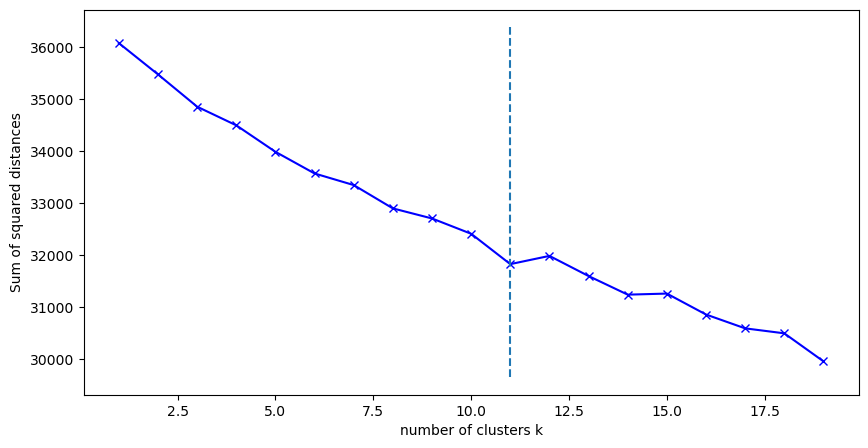

In [ ]:
inertia = []

K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tf_idf)
    inertia.append(kmeanModel.inertia_)

kn = KneeLocator(K, inertia, curve='convex', direction='decreasing')
print(kn.knee)

plt.figure(figsize=(10,5))

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(K, inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

In [ ]:
#Enter number of clusters and add k_means as a new column in the dataframe
clusters = 7
kmeanModel = KMeans(n_clusters=clusters, init='k-means++', max_iter=3000, random_state=0)
mod = kmeanModel.fit_transform(tf_idf)
df['k_means'] = kmeanModel.predict(tf_idf)

In [ ]:
#Top words per cluster (10)
order_centroids = kmeanModel.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
dict = []
for i in range(clusters):
    print("%d" % i, sep='', end=','),
    for ind in order_centroids[i, :10]:
        print(terms[ind], sep='', end=',')
    print('')

0,islands,guinea,republic,congo,south,french,island,korea,sudan,united,
1,thailand,vietnam,indonesia,asia,philippines,malaysia,cambodia,laos,singapore,asean,
2,junta,military,happening,report,read,help,regime,people,coup,state,
3,day,news,one,link,us,world,people,time,international,miss,
4,new,year,time,cases,us,deaths,service,thailand,design,total,
5,yangon,pm,please,township,job,experience,street,service,location,work,
6,good,phone,pro,red,view,yangon,day,made,contact,news,


In [ ]:
#cluster sizes
df.groupby('k_means').count().reset_index()[['k_means', 'platformId']]

,k_means,platformId
0,0,864
1,1,3697
2,2,3867
3,3,27273
4,4,1320
5,5,4489
6,6,1086


### Method 2: LDA Modeling

In [ ]:
#Use the pre-processed text
posts = df['features'].copy()
posts = posts.reset_index()
posts

,index,features
0,0,shopping fun easy myanmar online tech retailer...
1,1,myanmar song saya saw hlaing gospel songs song...
2,2,𝐖𝐇𝐎𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 miss universe sea team way get m...
3,3,fired job tested positive covid happened time ...
4,4,beautiful majestic waterfalls southeast asia d...
...,...,...
42591,56473,april ukraine richard falk doubt atrocities co...
42592,56474,statement attributable spokesperson secretary ...
42593,56478,today honored assoc prof dr kranthi raja conti...
42594,58884,myanmar workers held prisons express suffering...


In [ ]:
#Tokenize the texts, the rest of the preprocessing is already done
posts['features'] =  posts['features'].apply(word_tokenize)
posts['features'].head()

0    [shopping, fun, easy, myanmar, online, tech, r...
1    [myanmar, song, saya, saw, hlaing, gospel, son...
2    [𝐖𝐇𝐎𝐒, 𝐘𝐎𝐔𝐑, 𝐁𝐄𝐓, miss, universe, sea, team, w...
3    [fired, job, tested, positive, covid, happened...
4    [beautiful, majestic, waterfalls, southeast, a...
Name: features, dtype: object

In [ ]:
#Function for calculating coherence scores
def coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating for',num_topics,'topics')
        model = LdaModel(corpus=corpus, num_topics=num_topics)
        model_list.append(model)

        #You can adjust the method for coherence here (replace 'c_v' with any other method from the list above)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#create dictionary
id2word = corpora.Dictionary(posts['features'])

#Create a dictionary representation of the tweets.
#dictionary = Dictionary(tweets['features'])

#Filter out words that occur in less than 30 tweets or more than 60% of the documents. You can experiment with different values here.
id2word.filter_extremes(no_below=30, no_above=0.6)

#Create corpus
corpus = [id2word.doc2bow(doc) for doc in posts['features']]
#corpus = [dictionary.doc2bow(doc) for doc in tweets['features']]

start = 3
limit = 15
step = 1

model_list, coherence_values = coherence_values(dictionary=id2word, corpus=corpus, texts=posts['features'], start=start, limit=limit, step=step)


Calculating for 3 topics
Calculating for 4 topics
Calculating for 5 topics
Calculating for 6 topics
Calculating for 7 topics
Calculating for 8 topics
Calculating for 9 topics
Calculating for 10 topics
Calculating for 11 topics
Calculating for 12 topics
Calculating for 13 topics
Calculating for 14 topics


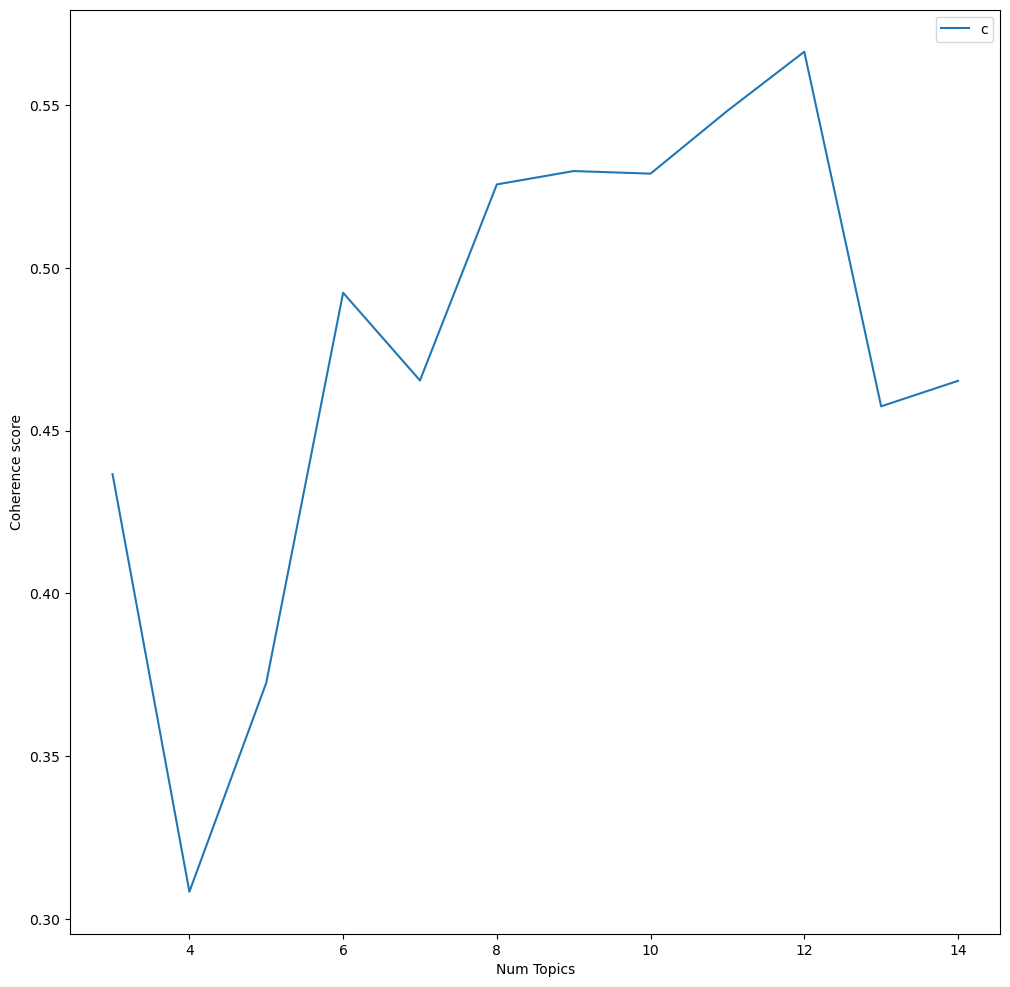

In [ ]:
#Visualise the coherence scores in a plot
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
#list the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.4366
Num Topics = 4  has Coherence Value of 0.3083
Num Topics = 5  has Coherence Value of 0.3725
Num Topics = 6  has Coherence Value of 0.4924
Num Topics = 7  has Coherence Value of 0.4654
Num Topics = 8  has Coherence Value of 0.5256
Num Topics = 9  has Coherence Value of 0.5298
Num Topics = 10  has Coherence Value of 0.529
Num Topics = 11  has Coherence Value of 0.5483
Num Topics = 12  has Coherence Value of 0.5664
Num Topics = 13  has Coherence Value of 0.4575
Num Topics = 14  has Coherence Value of 0.4653


In [ ]:
# Coherence score merely offer orientation and do not necessarily indicate clear topics: I will use 7 topics
model = LdaModel(corpus=corpus, num_topics=7, id2word=id2word)
model.print_topics()

[(0,
  '0.016*"solution" + 0.016*"chemical" + 0.007*"work" + 0.007*"experience" + 0.006*"stock" + 0.006*"yangon" + 0.005*"mmk" + 0.005*"years" + 0.005*"job" + 0.005*"english"'),
 (1,
  '0.057*"price" + 0.018*"aung" + 0.010*"ah" + 0.010*"ko" + 0.009*"min" + 0.008*"good" + 0.008*"pro" + 0.007*"si" + 0.007*"le" + 0.007*"phone"'),
 (2,
  '0.012*"republic" + 0.010*"guinea" + 0.010*"south" + 0.008*"islands" + 0.008*"united" + 0.008*"congo" + 0.007*"korea" + 0.006*"saint" + 0.006*"covid" + 0.006*"sudan"'),
 (3,
  '0.025*"new" + 0.018*"news" + 0.016*"deaths" + 0.015*"rohingya" + 0.015*"pm" + 0.014*"cases" + 0.012*"total" + 0.011*"singapore" + 0.011*"reported" + 0.007*"live"'),
 (4,
  '0.022*"ni" + 0.015*"leh" + 0.012*"chu" + 0.012*"asia" + 0.011*"thailand" + 0.011*"malaysia" + 0.011*"asean" + 0.010*"indonesia" + 0.010*"vietnam" + 0.009*"te"'),
 (5,
  '0.010*"people" + 0.008*"military" + 0.006*"also" + 0.006*"one" + 0.005*"junta" + 0.005*"state" + 0.005*"said" + 0.005*"us" + 0.005*"country" + 0

### Topic modeling over time:

Some topics being more interesting at different points in time?

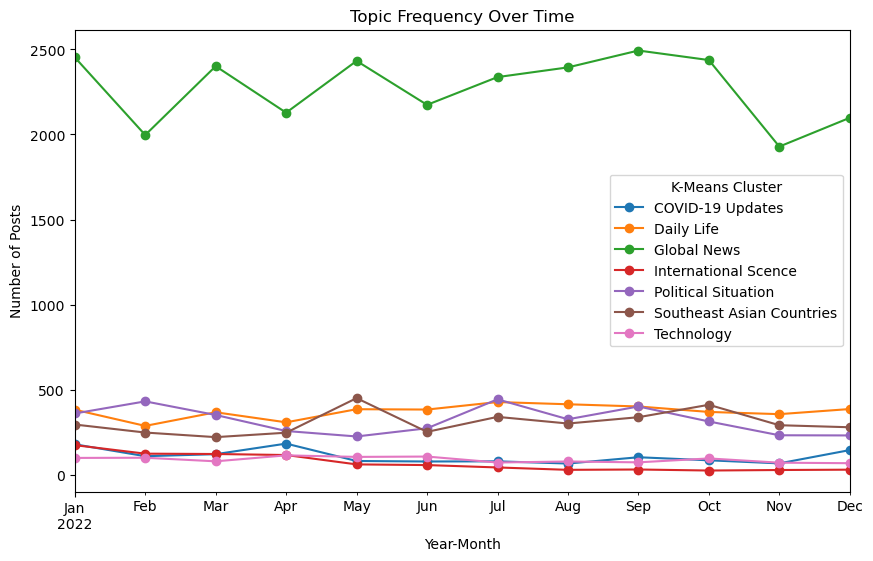

In [ ]:
# Convert 'timestamp' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the timestamp
df['year_month'] = df['date'].dt.to_period('M')

# Mapping of k_means cluster numbers to titles
k_means_titles = {
    0: "International Scence",
    1: "Southeast Asian Countries",
    2: "Political Situation",
    3: "Global News",
    4: "COVID-19 Updates",
    5: "Daily Life",
    6: "Technology"
}

# Assuming 'k_means' column contains the cluster numbers
df['k_means_titles'] = df['k_means'].map(k_means_titles)

# Group by year_month and k_means_titles, count the number of posts
k_means_topic_counts = df.groupby(['year_month', 'k_means_titles']).size().unstack().fillna(0)

# Plot the time series for each k_means cluster
ax = k_means_topic_counts.plot(kind='line', marker='o', figsize=(10, 6))

# Save the image
plt.title('Topic Frequency Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.legend(title='K-Means Cluster')
plt.savefig('k_means_cluster_frequency_over_time.png')
plt.show()

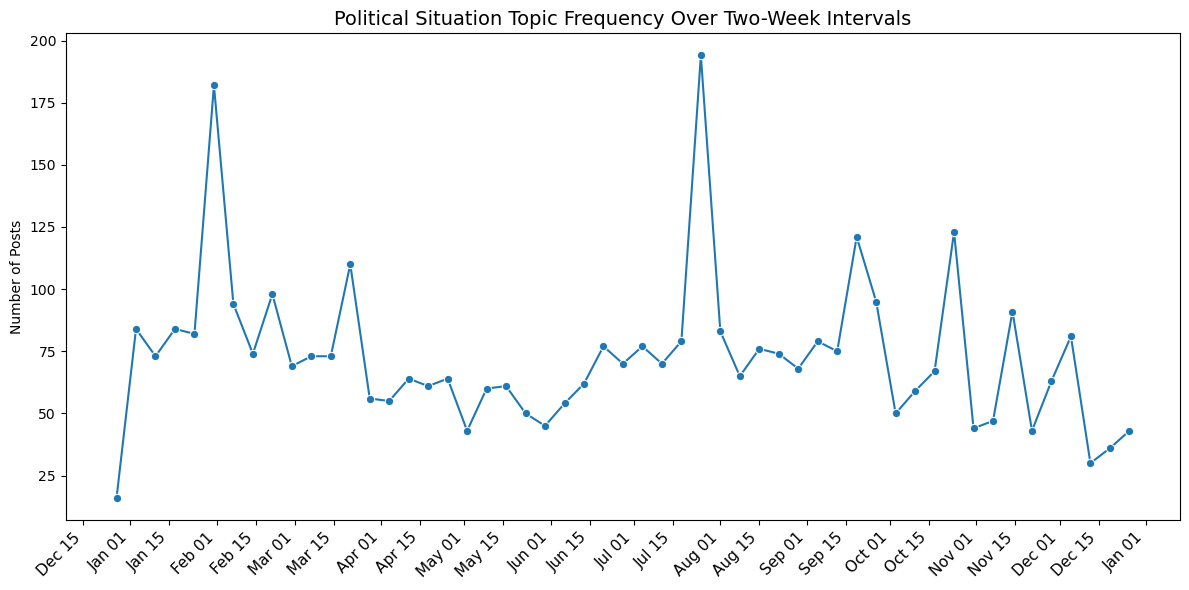

In [ ]:
# Convert periods to datetime objects for better plotting with Seaborn
df['two_week_interval'] = df['date'].dt.to_period('2W').apply(lambda x: x.start_time)

# Filter for Topic 2
topic_2_df = df[df['k_means'] == 2]

# Count occurrences of Topic 2 in each interval
topic_counts = topic_2_df['two_week_interval'].value_counts().sort_index()

# Plot the results using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=topic_counts.index, y=topic_counts.values, marker='o', linestyle='-')
plt.title('Political Situation Topic Frequency Over Two-Week Intervals', fontsize = 14)
#plt.xlabel('Two-Week Interval')
plt.ylabel('Number of Posts')

# Set locator for x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=[1, 15]))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45, ha='right', fontsize=11)  # Adjust font size for better readability
plt.tight_layout()
plt.savefig('political_frequency_seaborn.png')
plt.show()

Now we will analyze the Facebook user metrics per topic

In [ ]:
df.columns

Index(['platformId', 'platform', 'date', 'updated', 'type', 'message',
       'expandedLinks', 'link', 'postUrl', 'subscriberCount', 'score', 'media',
       'videoLengthMS', 'languageCode', 'legacyId', 'id',
       'statistics.actual.likeCount', 'statistics.actual.shareCount',
       'statistics.actual.commentCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.thankfulCount', 'statistics.actual.careCount',
       'statistics.expected.likeCount', 'statistics.expected.shareCount',
       'statistics.expected.commentCount', 'statistics.expected.loveCount',
       'statistics.expected.wowCount', 'statistics.expected.hahaCount',
       'statistics.expected.sadCount', 'statistics.expected.angryCount',
       'statistics.expected.thankfulCount', 'statistics.expected.careCount',
       'account.id', 'account.name', 'account.handle', 'account.pro

In [ ]:
# Group by 'k_means' (topic) and sum the statistics counts
topic_statistics = df.groupby('k_means').agg({
    'statistics.actual.loveCount': 'sum',
    'statistics.actual.wowCount': 'sum',
    'statistics.actual.hahaCount': 'sum',
    'statistics.actual.sadCount': 'sum',
    'statistics.actual.angryCount': 'sum',
    'statistics.actual.careCount': 'sum'
})


# Calculate the total counts for each topic
topic_totals = topic_statistics.sum(axis=1)

# Calculate the percentages
topic_percentages = topic_statistics.divide(topic_totals, axis=0) * 100

# Display the resulting DataFrame
topic_percentages

,statistics.actual.loveCount,statistics.actual.wowCount,statistics.actual.hahaCount,statistics.actual.sadCount,statistics.actual.angryCount,statistics.actual.careCount
k_means,,,,,,
0,83.573150,2.195337,3.791729,1.097669,0.725416,8.616699
1,58.729392,9.483306,20.455543,4.989661,0.636708,5.705390
2,27.235412,1.662475,11.181648,44.585271,10.885235,4.449959
3,75.620186,1.540621,9.310343,8.715311,0.539137,4.274402
4,81.312543,2.396873,6.164678,5.364998,0.212189,4.548719
5,83.878454,2.265023,4.410067,4.035550,0.856863,4.554042
6,91.580912,0.353737,2.338897,1.113760,0.059610,4.553084


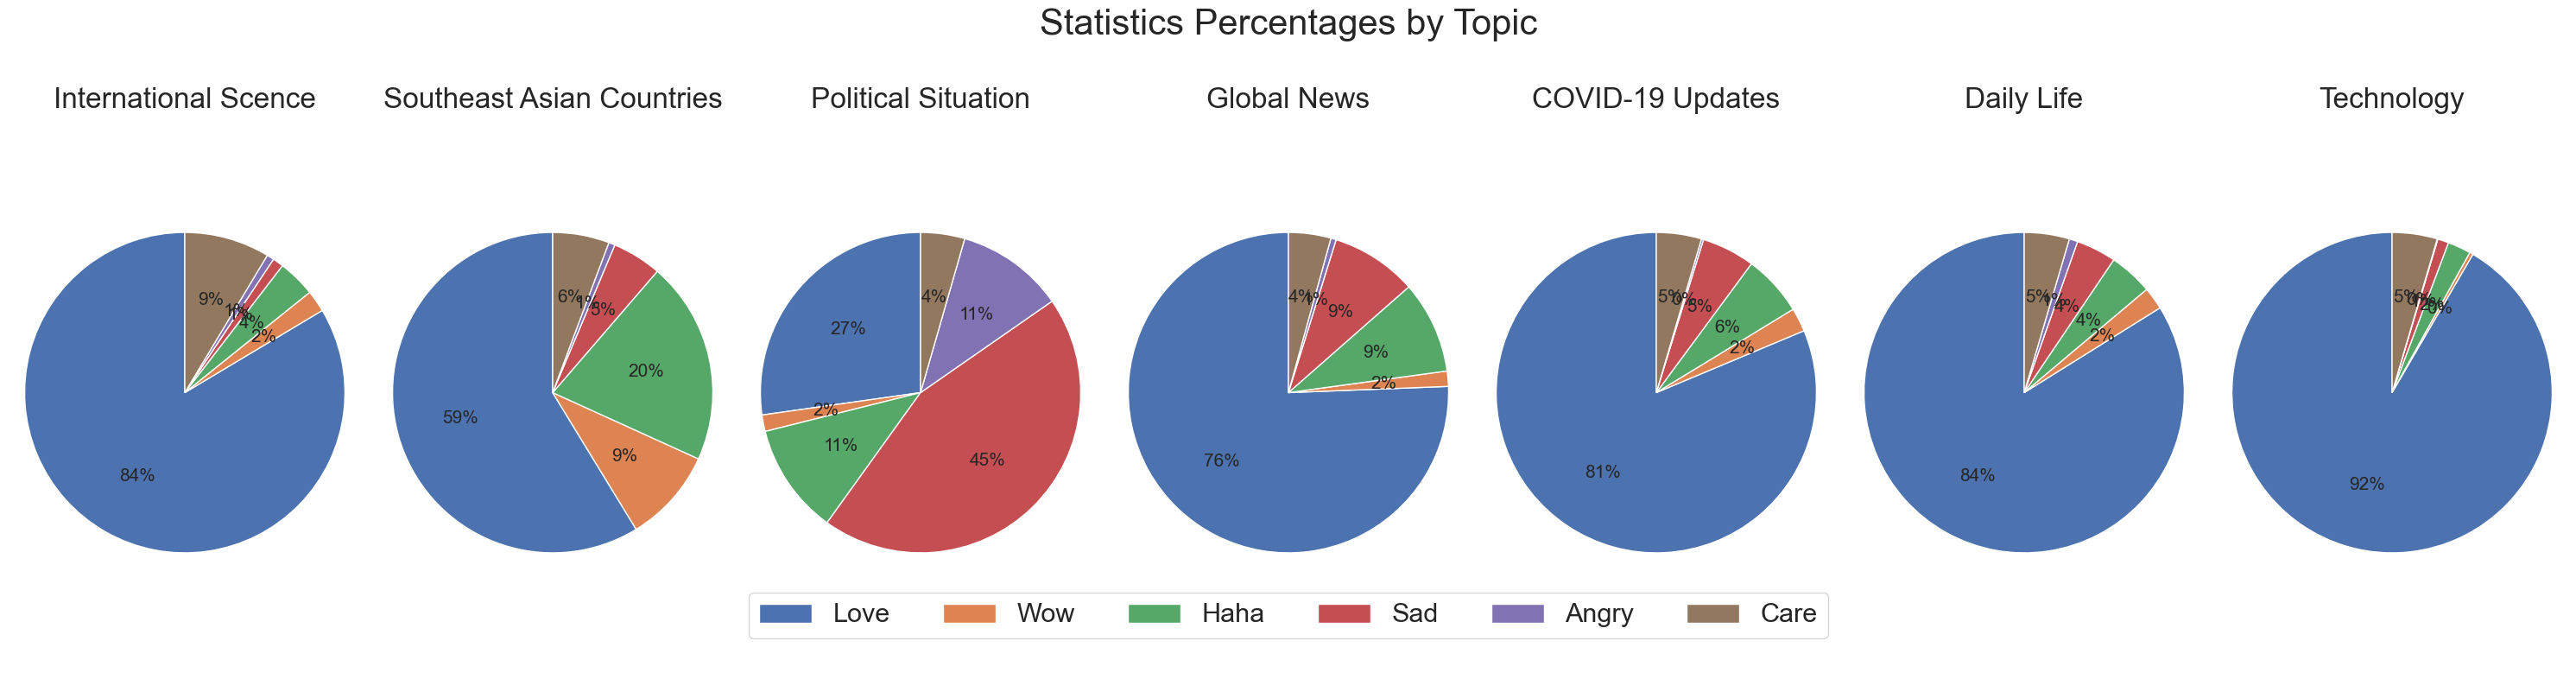

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(30, 8))
fig.suptitle('Statistics Percentages by Topic', fontsize=30)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Define custom statistic labels
custom_labels = ['Love', 'Wow', 'Haha', 'Sad', 'Angry', 'Care']

# Iterate through each row (topic) in the DataFrame
for index, (topic, row) in enumerate(topic_percentages.iterrows()):
    sizes = row.values  # Corresponding percentages

    # Plot the pie chart using matplotlib
    axes[index].pie(sizes, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 15})
    axes[index].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    axes[index].set_title(k_means_titles[topic],fontsize=24)

# Add a common legend at the bottom
fig.legend(custom_labels, loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=6, fontsize=22)



# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('piecharts')
# Show the combined pie charts
plt.show()

In [ ]:
# Find the predominant statistic for each topic
predominant_statistic = topic_percentages.idxmax(axis=1)

# Find the percentage of predominance for each topic
percentage_of_predominance = topic_percentages.max(axis=1).round(2)

# Map the statistic names to more human-readable names
statistic_mapping = {
    'statistics.actual.loveCount': 'Love',
    'statistics.actual.wowCount': 'Wow',
    'statistics.actual.hahaCount': 'Haha',
    'statistics.actual.sadCount': 'Sad',
    'statistics.actual.angryCount': 'Angry',
    'statistics.actual.careCount': 'Care'
}

# Replace column names with human-readable names
predominant_statistic = predominant_statistic.map(statistic_mapping)

# Create a new DataFrame to display the results
result_df = pd.DataFrame({
    'Topic Title': k_means_titles,  # Use 'k_means_titles' instead of mapping from another DataFrame
    'Predominant Statistic': predominant_statistic,
    'Percentage of Predominance': percentage_of_predominance
})

# Display the resulting DataFrame
result_df

,Topic Title,Predominant Statistic,Percentage of Predominance
0,International Scence,Love,83.57
1,Southeast Asian Countries,Love,58.73
2,Political Situation,Sad,44.59
3,Global News,Love,75.62
4,COVID-19 Updates,Love,81.31
5,Daily Life,Love,83.88
6,Technology,Love,91.58


## Sentiment Analysis

In [ ]:
#Sentiment analysis with VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_score_vader(x):
    score = analyzer.polarity_scores(x)
    return score['compound']

df['score'] = df['features'].apply(lambda x: get_score_vader(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/paula/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
average_score_per_topic = df.groupby('k_means')['score'].mean().reset_index()

In [ ]:
result_df = pd.concat([result_df, average_score_per_topic['score']], axis=1)

In [ ]:
result_df

,Topic Title,Predominant Statistic,Percentage of Predominance,score
0,International Scence,Love,83.57,0.447685
1,Southeast Asian Countries,Love,58.73,0.425111
2,Political Situation,Sad,44.59,-0.184291
3,Global News,Love,75.62,0.283432
4,COVID-19 Updates,Love,81.31,0.442847
5,Daily Life,Love,83.88,0.557012
6,Technology,Love,91.58,0.435397


### Sentiment Analysis over time and category

In [ ]:
#Splitting the date
# Convert 'date' column back to its original format
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
df[['year_month_day', 'time']]=df['date'].str.split(expand=True)
df[['year', 'month', 'day']]=df['year_month_day'].str.split("-",expand=True)
df.loc[:,['features','score','year_month_day', 'year', 'month', 'day']]

,features,score,year_month_day,year,month,day
0,shopping fun easy myanmar online tech retailer...,0.7351,2022-09-06,2022,09,06
1,myanmar song saya saw hlaing gospel songs song...,0.0000,2022-03-04,2022,03,04
2,𝐖𝐇𝐎𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 miss universe sea team way get m...,0.4588,2022-12-17,2022,12,17
3,fired job tested positive covid happened time ...,-0.7334,2022-06-16,2022,06,16
4,beautiful majestic waterfalls southeast asia d...,0.8271,2022-10-02,2022,10,02
...,...,...,...,...,...,...
56473,april ukraine richard falk doubt atrocities co...,-0.9968,2022-04-10,2022,04,10
56474,statement attributable spokesperson secretary ...,-0.9231,2022-07-26,2022,07,26
56478,today honored assoc prof dr kranthi raja conti...,0.8402,2022-04-20,2022,04,20
58884,myanmar workers held prisons express suffering...,-0.4767,2022-01-18,2022,01,18


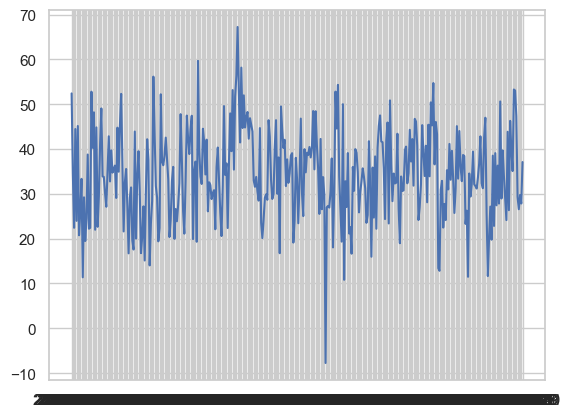

In [ ]:
#ALL CATEGORIES GROUPED BY DAY, ABSOLUTE SENTIMENT
day_grouped_abs = df.groupby(df['year_month_day']).sum()['score']
df_day_abs = pd.DataFrame({'Day':day_grouped_abs.index, 'Score' : day_grouped_abs.values})
plt.plot(df_day_abs.iloc[:,0],df_day_abs.iloc[:,1])

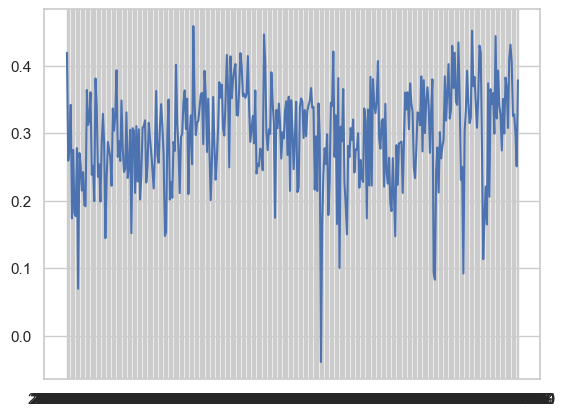

In [ ]:
#ALL CATEGORIES GROUPED BY DAY, RELATIVE SENTIMENT
day_grouped_rel = df.groupby(df['year_month_day']).mean()['score']
df_day_rel = pd.DataFrame({'Day':day_grouped_rel.index, 'Score' : day_grouped_rel.values})
plt.plot(df_day_rel.iloc[:,0],df_day_rel.iloc[:,1])

### Grouping per category

In [ ]:
#Creating groups
df_media = df[df['account.pageCategory'].isin([ 'MEDIA_NEWS_COMPANY', 'NEWS_SITE', 'BROADCASTING_MEDIA_PRODUCTION', 'TV_CHANNEL', 'MEDIA''TOPIC_NEWSPAPER', 'JOURNALIST', 'TV_SHOW', 'PODCAST' , 'MAGAZINE'])]
df_pol = df[df['account.pageCategory'].isin(['POLITICIAN', 'POLITICAL_ORGANIZATION', 'POLITICAL_PARTY'])]
df_gov = df[df['account.pageCategory'].isin(['GOVERNMENT_ORGANIZATION', 'PUBLIC_SERVICES_GOVERNMENT', 'GOVERNMENT_BUILDING', 'CONSULATE_EMBASSY', 'GOV_SITE', 'GOVERNMENT_OFFICIAL'])]
df_nonprof = df[df['account.pageCategory'].isin(['NON_PROFIT', 'CHARITY_ORGANIZATION', 'ENVIRONMENTAL_CONSERVATION', 'NGO'])]
df_other = df[df['account.pageCategory'].isin(['ACTIVITY_GENERAL', 'RELIGIOUS_ORGANIZATION', 'FAN_PAGE', 'LOCAL','CLOTHING_STORE', 'FRUIT_VEGETABLE_STORE', 'BOXING_STUDIO', 'TOURIST_INFORMATION' , 'SHOE_STORE', 'RELIGIOUS_CENTER','SPORTS_LEAGUE', 'CONSULTING_COMPANY', 'EMPLOYMENT_AGENCY', 'HISTORY_MUSEUM', 'ACTIVITY_SPORT', 'PRODUCT_SERVICE', 'TOPIC_HOTEL', 'AIRLINE', 'HEALTH_BEAUTY', 'RETAIL_COMPANY', 'AMATEUR_TEAM', 'ORG_GENERAL', 'CHRISTIAN_CHURCH', 'CHURCH', 'DANCE_SCHOOL', 'SPORTS_TEAM', 'TUTORING', 'DESIGN',   'ENGINEERING_SERVICE', 'CHILDRENS_CLOTHING_STORE', 'PHOTOGRAPHIC_SERVICES_EQUIPMENT', 'RESTAURANT', 'SKIN_CARE_SERVICES', 'FASHION_MODEL', 'AUTO_DETAILING_SERVICE', 'ZOO', 'TRAVEL_AGENCY', 'BUDDHIST_TEMPLE', 'FINANCE', 'BRAND', 'SOFTWARE_COMPANY', 'TICKET_SALES', 'CAFE', 'LEGAL_SERVICES',  'SPORTS_EVENT', 'HOT_POT_RESTAURANT', 'ESPORTS_LEAGUE', 'BAKERY', 'WEDDING_PLANNING', 'SOUVENIR_SHOP', 'GAME', 'SPORTS',   'FASHION_DESIGNER', 'COMPANY', 'CATHOLIC_CHURCH', 'ELECTRONICS', 'SPA_BEAUTY_PERSONAL_CARE', 'BIKE_SHOP', 'SEVENTH_DAY_ADVENTIST_CHURCH', 'BAGS_LUGGAGE', 'TOPIC_ARTS_ENTERTAINMENT', 'TOPIC_SHOPPING_RETAIL' , 'WOMENS_CLOTHING_STORE', 'CAR', 'CLOTHING', 'BAGS_LUGGAGE_COMPANY', 'JEWELRY_STORE',  'COFFEE_SHOP', 'THAI_RESTAURANT', 'ANIMATOR',  'PHARMACEUTICAL_COMPANY', 'SCIENCE_ENGINEERING',  'PUBLIC_SERVICES', 'TALENT_AGENT', 'COSMETICS_BEAUTY_SUPPLY', 'APP', 'BEACH_RESORT', 'DANCE_INSTRUCTION', 'MEDITATION_CENTER', 'NEWS_PERSONALITY', 'CAREER_COUNSELOR',  'TOOLS_EQUIPMENT', 'PENTECOSTAL_CHURCH', 'FITNESS_MODEL', 'SPORTS_VENUE_STADIUM', 'TOPIC_BOOK_STORE', 'SCIENCE_SITE', 'ARTS_CRAFTS_SUPPLY_STORE',  'TV_NETWORK', 'RADIO_STATION',  'SPA', 'ENERGY_COMPANY', 'SHOPPING_SERVICE', 'TOPIC_JUST_FOR_FUN',  'MENS_CLOTHING_STORE', 'INFORMATION_TECHNOLOGY_COMPANY', 'SOCIAL_MEDIA_AGENCY', 'ARCHITECTURAL_DESIGNER', 'MODELING_AGENCY',  'RESORT',  'ECOMMERCE_WEBSITE', 'FURNITURE', 'COMPUTER_STORE', 'ADVERTISING_MARKETING', 'COMMUNITY_SERVICES',   'SPORTSWEAR_STORE', 'TOPIC_BUSINESS_SERVICES', 'TRAVEL_SITE', 'CAMERA_PHOTO', 'TOPIC_EVENT', 'SPORTS_OUTDOORS' ,  'COMMERCIAL_BANK', 'SOCIAL_SERVICES', 'PHONE_TABLET', 'JEWELRY_WATCHES', 'ESPORTS_TEAM', 'TRAVEL_COMPANY', 'MEDICAL_HEALTH',  'TEXTILES', 'ARTS_SITE', 'TOPIC_BAR', 'TOPIC_TOURS_SIGHTSEEING', 'NAIL_SALON', 'CONSTRUCTION_COMPANY', 'GOLF_COURSE''AUTOMOTIVE_PARTS_ACCESSORIES', 'ADVERTISING_AGENCY',  'ECO_TOURS', 'GIFT_SHOP', 'VIDEO_GAMES', 'INTERIOR_DESIGNER', 'TOPIC_SPORTS_RECREATION', 'REC_SITE', 'WEBSITE', 'TOPIC_HOME_DECOR',  'MOBILE_PHONE_SHOP', 'CITY_INFRASTRUCTURE', 'HOSPITAL', 'BRIDAL_SHOP', 'SONG', 'FINANCIAL_SERVICES', 'TATTOO_PIERCING_SHOP', 'COSMETICS_BEAUTY_SUPPLY', 'CAUSE', 'TOPIC_LIBRARY', 'ECO_TOURS', 'COMMUNITY', 'COMMUNITY_ORGANIZATION', 'MUSIC_VIDEO', 'BABY_KIDS', 'ART', 'PUBLIC_SERVICES', 'LOCAL_SERVICES', 'ENTERTAINMENT_SITE'])]
df_educ = df[df['account.pageCategory'].isin(['EDUCATIONAL_CONSULTANT', 'CAMPUS_BUILDING', 'EDUCATIONAL_RESEARCH', 'UNIVERSITY', 'COMMUNITY_COLLEGE', 'PRESCHOOL', 'SCHOOL', 'EDUCATION_COMPANY', 'LANGUAGE_SCHOOL', 'EDUCATIONAL_CAMP', 'RELIGIOUS_SCHOOL', 'PRIVATE_SCHOOL', 'RECRUITER', 'HIGH_SCHOOL', 'PUBLIC_SCHOOL', 'EDU_SITE'])]
df_person = df[df['account.pageCategory'].isin(['PERSON', 'VIDEO_CREATOR', 'PERSONAL_BLOG', 'ARTIST', 'CONTRACTOR', 'ACTOR', 'BLOGGER', 'MUSICIAN', 'TOPIC_PHOTOGRAPHER', 'BUSINESS_CONSULTANT', 'FILM_DIRECTOR', 'PERSONAL_TRAINER', 'PROFESSIONAL_GAMER' , 'AUTHOR', 'COMEDIAN' , 'ENTREPRENEUR', 'GAMING_VIDEO_CREATOR',  'ATHLETE', 'DESIGNER', 'PRODUCER', 'TRANSLATOR', 'TALENT_AGENT', 'MAKEUP_ARTIST','TOPIC_PUBLISHER', 'DIGITAL_CREATOR', 'MOVIE_WRITER'])]


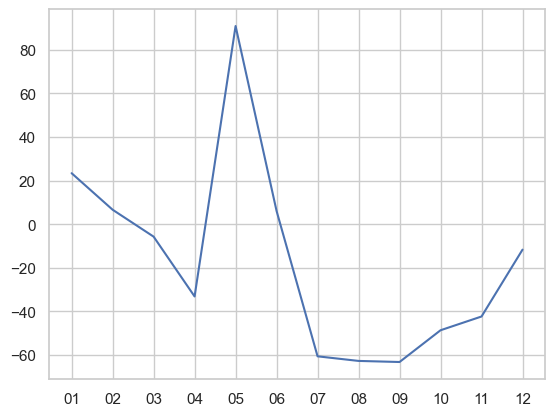

In [ ]:
#FOR ONLY MEDIA, GROUP BY MONTH ABSOLUTE
media_grouped_abs = df_media.groupby(df['month']).sum()['score']
df_media_abs = pd.DataFrame({'Day':media_grouped_abs.index, 'Score' : media_grouped_abs.values})
plt.plot(df_media_abs.iloc[:,0],df_media_abs.iloc[:,1])

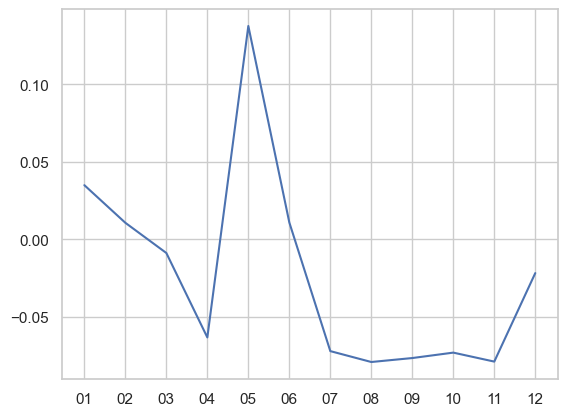

In [ ]:
#FOR ONLY MEDIA, GROUP BY MONTH RELATIVE
media_grouped_rel = df_media.groupby(df['month']).mean()['score']
df_media_rel = pd.DataFrame({'Day':media_grouped_rel.index, 'Score_mean' : media_grouped_rel.values})
plt.plot(df_media_rel.iloc[:,0],df_media_rel.iloc[:,1])

In [ ]:
#GENERAL SENTIMENTS:
print('Average sentiment for media is', df_media['score'].mean())
print('Average sentiment for government is', df_gov['score'].mean())
print('Average sentiment for politics is', df_pol['score'].mean())
print('Average sentiment for non_profit is', df_nonprof['score'].mean())
print('Average sentiment for person is', df_person['score'].mean())
print('Average sentiment for education is', df_educ['score'].mean())
print('Average sentiment for general is', df['score'].mean())

Average sentiment for media is -0.025470835976151247
Average sentiment for government is 0.33039201154956693
Average sentiment for politics is 0.28657941176470575
Average sentiment for non_profit is 0.3575517353579172
Average sentiment for person is 0.3618395342389821
Average sentiment for education is 0.5980445661331099
Average sentiment for general is 0.2942449666635308


In [ ]:
print('Average sentiment for MEDIA_NEWS_COMPANY is', df[(df['account.pageCategory']=='MEDIA_NEWS_COMPANY')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='MEDIA_NEWS_COMPANY')]) ,'posts')
print('Average sentiment for NEWS_SITE is', df[(df['account.pageCategory']=='NEWS_SITE')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='NEWS_SITE')]) ,'posts')
print('Average sentiment for BROADCASTING_MEDIA_PRODUCTION is', df[(df['account.pageCategory']=='BROADCASTING_MEDIA_PRODUCTION')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='BROADCASTING_MEDIA_PRODUCTION')]) ,'posts')
print('Average sentiment for TV_CHANNEL is', df[(df['account.pageCategory']=='TV_CHANNEL')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='TV_CHANNEL')]) ,'posts')
print('Average sentiment for MEDIA is', df[(df['account.pageCategory']=='MEDIA')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='MEDIA')]) ,'posts')
print('Average sentiment for TOPIC_NEWSPAPER is', df[(df['account.pageCategory']=='TOPIC_NEWSPAPER')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='TOPIC_NEWSPAPER')]) ,'posts')
print('Average sentiment for JOURNALIST is', df[(df['account.pageCategory']=='JOURNALIST')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='JOURNALIST')]) ,'posts')
print('Average sentiment for TV_SHOW is', df[(df['account.pageCategory']=='TV_SHOW')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='TV_SHOW')]) ,'posts')
print('Average sentiment for PODCAST is', df[(df['account.pageCategory']=='PODCAST')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='PODCAST')]) ,'posts')
print('Average sentiment for MAGAZINE is', df[(df['account.pageCategory']=='MAGAZINE')]['score'].mean() , 'in' ,len(df[(df['account.pageCategory']=='MAGAZINE')]) ,'posts')

Average sentiment for MEDIA_NEWS_COMPANY is -0.055697018657434004 in 5199 posts
Average sentiment for NEWS_SITE is 0.040751620648259296 in 1666 posts
Average sentiment for BROADCASTING_MEDIA_PRODUCTION is -0.08157079303675044 in 517 posts
Average sentiment for TV_CHANNEL is 0.1428478260869565 in 69 posts
Average sentiment for MEDIA is 0.05505263157894738 in 247 posts
Average sentiment for TOPIC_NEWSPAPER is 0.07651367521367522 in 117 posts
Average sentiment for JOURNALIST is 0.15542432432432438 in 111 posts
Average sentiment for TV_SHOW is 0.38022307692307705 in 91 posts
Average sentiment for PODCAST is -0.054310126582278524 in 79 posts
Average sentiment for MAGAZINE is 0.03737549668874176 in 151 posts


In [ ]:
df[(df['account.pageCategory']=='MEDIA_NEWS_COMPANY')]['score'].mean()

-0.055697018657434004

In [ ]:
# Mapping dictionary for categories
category_mapping = {
    'media': ['MEDIA_NEWS_COMPANY', 'NEWS_SITE', 'BROADCASTING_MEDIA_PRODUCTION', 'TV_CHANNEL', 'MEDIA''TOPIC_NEWSPAPER', 'JOURNALIST', 'TV_SHOW', 'PODCAST', 'MAGAZINE'],
    'pol': ['POLITICIAN', 'POLITICAL_ORGANIZATION', 'POLITICAL_PARTY'],
    'gov': ['GOVERNMENT_ORGANIZATION', 'PUBLIC_SERVICES_GOVERNMENT', 'GOVERNMENT_BUILDING', 'CONSULATE_EMBASSY', 'GOV_SITE', 'GOVERNMENT_OFFICIAL'],
    'nonprof': ['NON_PROFIT', 'CHARITY_ORGANIZATION', 'ENVIRONMENTAL_CONSERVATION', 'NGO'],
    'other' :[ 'ACTIVITY_GENERAL', 'RELIGIOUS_ORGANIZATION', 'FAN_PAGE', 'LOCAL','CLOTHING_STORE', 'FRUIT_VEGETABLE_STORE', 'BOXING_STUDIO', 'TOURIST_INFORMATION' , 'SHOE_STORE', 'RELIGIOUS_CENTER','SPORTS_LEAGUE', 'CONSULTING_COMPANY', 'EMPLOYMENT_AGENCY', 'HISTORY_MUSEUM', 'ACTIVITY_SPORT', 'PRODUCT_SERVICE', 'TOPIC_HOTEL', 'AIRLINE', 'HEALTH_BEAUTY', 'RETAIL_COMPANY', 'AMATEUR_TEAM', 'ORG_GENERAL', 'CHRISTIAN_CHURCH', 'CHURCH', 'DANCE_SCHOOL', 'SPORTS_TEAM', 'TUTORING', 'DESIGN',   'ENGINEERING_SERVICE', 'CHILDRENS_CLOTHING_STORE', 'PHOTOGRAPHIC_SERVICES_EQUIPMENT', 'RESTAURANT', 'SKIN_CARE_SERVICES', 'FASHION_MODEL', 'AUTO_DETAILING_SERVICE', 'ZOO', 'TRAVEL_AGENCY', 'BUDDHIST_TEMPLE', 'FINANCE', 'BRAND', 'SOFTWARE_COMPANY', 'TICKET_SALES', 'CAFE', 'LEGAL_SERVICES',  'SPORTS_EVENT', 'HOT_POT_RESTAURANT', 'ESPORTS_LEAGUE', 'BAKERY', 'WEDDING_PLANNING', 'SOUVENIR_SHOP', 'GAME', 'SPORTS',   'FASHION_DESIGNER', 'COMPANY', 'CATHOLIC_CHURCH', 'ELECTRONICS', 'SPA_BEAUTY_PERSONAL_CARE', 'BIKE_SHOP', 'SEVENTH_DAY_ADVENTIST_CHURCH', 'BAGS_LUGGAGE', 'TOPIC_ARTS_ENTERTAINMENT', 'TOPIC_SHOPPING_RETAIL' , 'WOMENS_CLOTHING_STORE', 'CAR', 'CLOTHING', 'BAGS_LUGGAGE_COMPANY', 'JEWELRY_STORE',  'COFFEE_SHOP', 'THAI_RESTAURANT', 'ANIMATOR',  'PHARMACEUTICAL_COMPANY', 'SCIENCE_ENGINEERING',  'PUBLIC_SERVICES', 'TALENT_AGENT', 'COSMETICS_BEAUTY_SUPPLY', 'APP', 'BEACH_RESORT', 'DANCE_INSTRUCTION', 'MEDITATION_CENTER', 'NEWS_PERSONALITY', 'CAREER_COUNSELOR',  'TOOLS_EQUIPMENT', 'PENTECOSTAL_CHURCH', 'FITNESS_MODEL', 'SPORTS_VENUE_STADIUM', 'TOPIC_BOOK_STORE', 'SCIENCE_SITE', 'ARTS_CRAFTS_SUPPLY_STORE',  'TV_NETWORK', 'RADIO_STATION',  'SPA', 'ENERGY_COMPANY', 'SHOPPING_SERVICE', 'TOPIC_JUST_FOR_FUN',  'MENS_CLOTHING_STORE', 'INFORMATION_TECHNOLOGY_COMPANY', 'SOCIAL_MEDIA_AGENCY', 'ARCHITECTURAL_DESIGNER', 'MODELING_AGENCY',  'RESORT',  'ECOMMERCE_WEBSITE', 'FURNITURE', 'COMPUTER_STORE', 'ADVERTISING_MARKETING', 'COMMUNITY_SERVICES',   'SPORTSWEAR_STORE', 'TOPIC_BUSINESS_SERVICES', 'TRAVEL_SITE', 'CAMERA_PHOTO', 'TOPIC_EVENT', 'SPORTS_OUTDOORS' ,  'COMMERCIAL_BANK', 'SOCIAL_SERVICES', 'PHONE_TABLET', 'JEWELRY_WATCHES', 'ESPORTS_TEAM', 'TRAVEL_COMPANY', 'MEDICAL_HEALTH',  'TEXTILES', 'ARTS_SITE', 'TOPIC_BAR', 'TOPIC_TOURS_SIGHTSEEING', 'NAIL_SALON', 'CONSTRUCTION_COMPANY', 'GOLF_COURSE''AUTOMOTIVE_PARTS_ACCESSORIES', 'ADVERTISING_AGENCY',  'ECO_TOURS', 'GIFT_SHOP', 'VIDEO_GAMES', 'INTERIOR_DESIGNER', 'TOPIC_SPORTS_RECREATION', 'REC_SITE', 'WEBSITE', 'TOPIC_HOME_DECOR',  'MOBILE_PHONE_SHOP', 'CITY_INFRASTRUCTURE', 'HOSPITAL', 'BRIDAL_SHOP', 'SONG', 'FINANCIAL_SERVICES', 'TATTOO_PIERCING_SHOP', 'COSMETICS_BEAUTY_SUPPLY', 'CAUSE', 'TOPIC_LIBRARY', 'ECO_TOURS', 'COMMUNITY', 'COMMUNITY_ORGANIZATION', 'MUSIC_VIDEO', 'BABY_KIDS', 'ART', 'PUBLIC_SERVICES', 'LOCAL_SERVICES', 'ENTERTAINMENT_SITE' ] ,
    'educ' :[ 'EDUCATIONAL_CONSULTANT', 'CAMPUS_BUILDING', 'EDUCATIONAL_RESEARCH', 'UNIVERSITY', 'COMMUNITY_COLLEGE', 'PRESCHOOL', 'SCHOOL', 'EDUCATION_COMPANY', 'LANGUAGE_SCHOOL', 'EDUCATIONAL_CAMP', 'RELIGIOUS_SCHOOL', 'PRIVATE_SCHOOL', 'RECRUITER', 'HIGH_SCHOOL', 'PUBLIC_SCHOOL', 'EDU_SITE' ] ,
    'person' :[ 'PERSON', 'VIDEO_CREATOR', 'PERSONAL_BLOG', 'ARTIST', 'CONTRACTOR', 'ACTOR', 'BLOGGER', 'MUSICIAN', 'TOPIC_PHOTOGRAPHER', 'BUSINESS_CONSULTANT', 'FILM_DIRECTOR', 'PERSONAL_TRAINER', 'PROFESSIONAL_GAMER' , 'AUTHOR', 'COMEDIAN' , 'ENTREPRENEUR', 'GAMING_VIDEO_CREATOR',  'ATHLETE', 'DESIGNER', 'PRODUCER', 'TRANSLATOR', 'TALENT_AGENT', 'MAKEUP_ARTIST','TOPIC_PUBLISHER', 'DIGITAL_CREATOR', 'MOVIE_WRITER' ]
}

category_mapping = {
    'media': ['MEDIA_NEWS_COMPANY', 'NEWS_SITE', 'BROADCASTING_MEDIA_PRODUCTION', 'TV_CHANNEL', 'MEDIA''TOPIC_NEWSPAPER', 'JOURNALIST', 'TV_SHOW', 'PODCAST', 'MAGAZINE'],
    'pol': ['POLITICIAN', 'POLITICAL_ORGANIZATION', 'POLITICAL_PARTY'],
    'gov': ['GOVERNMENT_ORGANIZATION', 'PUBLIC_SERVICES_GOVERNMENT', 'GOVERNMENT_BUILDING', 'CONSULATE_EMBASSY', 'GOV_SITE', 'GOVERNMENT_OFFICIAL'],
    'nonprof': ['NON_PROFIT', 'CHARITY_ORGANIZATION', 'ENVIRONMENTAL_CONSERVATION', 'NGO'],
    'educ' :[ 'EDUCATIONAL_CONSULTANT', 'CAMPUS_BUILDING', 'EDUCATIONAL_RESEARCH', 'UNIVERSITY', 'COMMUNITY_COLLEGE', 'PRESCHOOL', 'SCHOOL', 'EDUCATION_COMPANY', 'LANGUAGE_SCHOOL', 'EDUCATIONAL_CAMP', 'RELIGIOUS_SCHOOL', 'PRIVATE_SCHOOL', 'RECRUITER', 'HIGH_SCHOOL', 'PUBLIC_SCHOOL', 'EDU_SITE' ] ,
    'person' :[ 'PERSON', 'VIDEO_CREATOR', 'PERSONAL_BLOG', 'ARTIST', 'CONTRACTOR', 'ACTOR', 'BLOGGER', 'MUSICIAN', 'TOPIC_PHOTOGRAPHER', 'BUSINESS_CONSULTANT', 'FILM_DIRECTOR', 'PERSONAL_TRAINER', 'PROFESSIONAL_GAMER' , 'AUTHOR', 'COMEDIAN' , 'ENTREPRENEUR', 'GAMING_VIDEO_CREATOR',  'ATHLETE', 'DESIGNER', 'PRODUCER', 'TRANSLATOR', 'TALENT_AGENT', 'MAKEUP_ARTIST','TOPIC_PUBLISHER', 'DIGITAL_CREATOR', 'MOVIE_WRITER' ]
}

# Create a new column 'category' based on 'account.pageCategory'
df['category'] = df['account.pageCategory'].apply(lambda x: next((k for k, v in category_mapping.items() if x in v), None))

# Display the first few rows of the DataFrame with the new 'category' column
df.head()

,platformId,platform,date,updated,type,message,expandedLinks,link,postUrl,subscriberCount,...,features,k_means,year_month,k_means_titles,two_week_interval,year_month_day,time,month,day,category
0,1514244588692373_5384107381706055,Facebook,2022-09-06 15:19:49,2022-10-07 01:08:13,native_video,Shopping is fun and easy at Myanmar's #1 Onlin...,"[{'original': 'https://ict.com.mm', 'expanded'...",https://www.facebook.com/ICT.com.mm/videos/632...,https://www.facebook.com/1514244588692373/post...,234388,...,shopping fun easy myanmar online tech retailer...,3,2022-09,Global News,2022-09-05,2022-09-06,15:19:49,09,06,None
1,100046915274813_496963795210792,Facebook,2022-03-04 11:41:38,2022-06-25 15:29:51,native_video,Myanmar Song by Saya Saw Hlaing https://youtu....,"[{'original': 'https://youtu.be/cyo5PHOwDm8', ...",https://www.facebook.com/thangpau/videos/10445...,https://www.facebook.com/100046915274813/posts...,42305,...,myanmar song saya saw hlaing gospel songs song...,3,2022-03,Global News,2022-02-28,2022-03-04,11:41:38,03,04,person
2,100069169818090_470355688613421,Facebook,2022-12-17 13:51:07,2023-06-24 21:36:06,native_video,𝐖𝐇𝐎'𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 | Miss Universe SEA Team is on ...,[{'original': 'https://www.facebook.com/100069...,https://www.facebook.com/100069169818090/video...,https://www.facebook.com/100069169818090/posts...,2823,...,𝐖𝐇𝐎𝐒 𝐘𝐎𝐔𝐑 𝐁𝐄𝐓 miss universe sea team way get m...,3,2022-12,Global News,2022-12-12,2022-12-17,13:51:07,12,17,person
3,1621019418208344_3161159747527629,Facebook,2022-06-16 07:13:58,2022-10-03 13:15:28,native_video,“I was fired from my job when I tested positiv...,[{'original': 'https://www.facebook.com/IOMTha...,https://www.facebook.com/IOMThailand/videos/54...,https://www.facebook.com/1621019418208344/post...,6210,...,fired job tested positive covid happened time ...,3,2022-06,Global News,2022-06-13,2022-06-16,07:13:58,06,16,nonprof
4,100064414045171_476686611155136,Facebook,2022-10-02 04:46:15,2022-10-06 03:13:49,photo,The most beautiful and majestic waterfalls in ...,[{'original': 'https://www.facebook.com/photo....,https://www.facebook.com/photo.php?fbid=476686...,https://www.facebook.com/100064414045171/posts...,61060,...,beautiful majestic waterfalls southeast asia d...,1,2022-10,Southeast Asian Countries,2022-09-26,2022-10-02,04:46:15,10,02,None


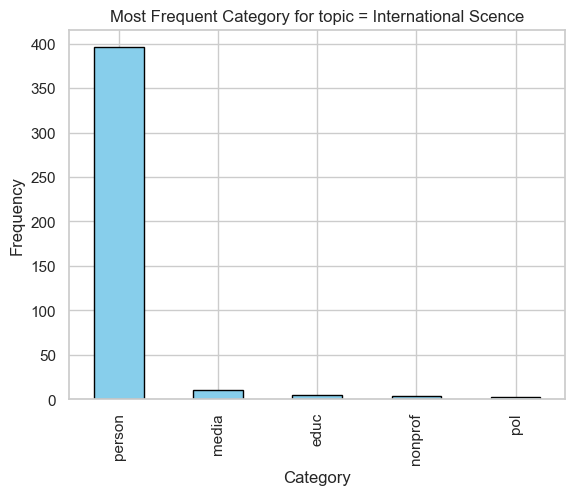

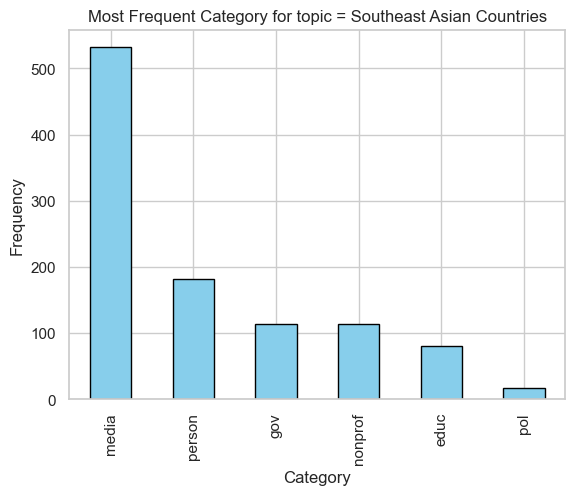

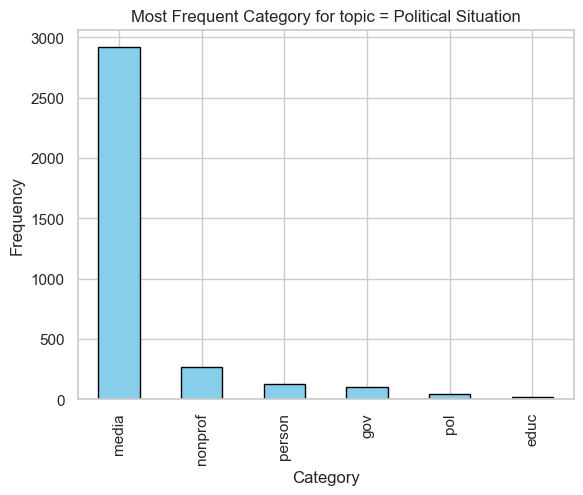

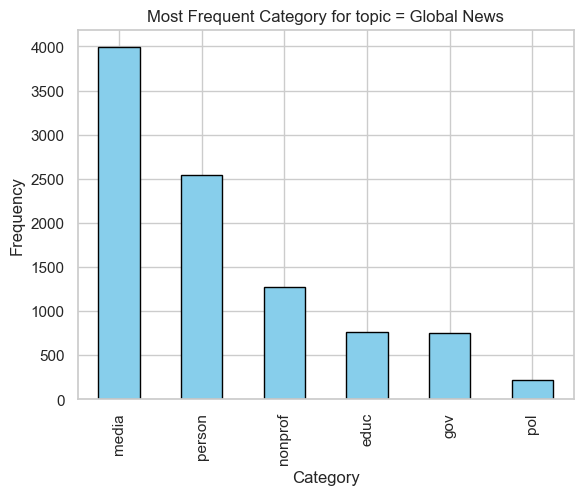

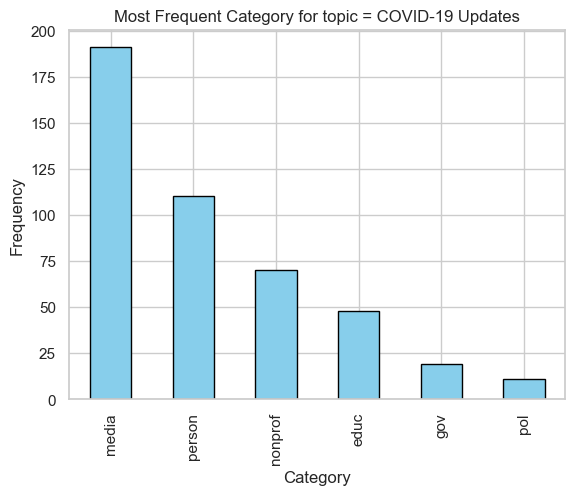

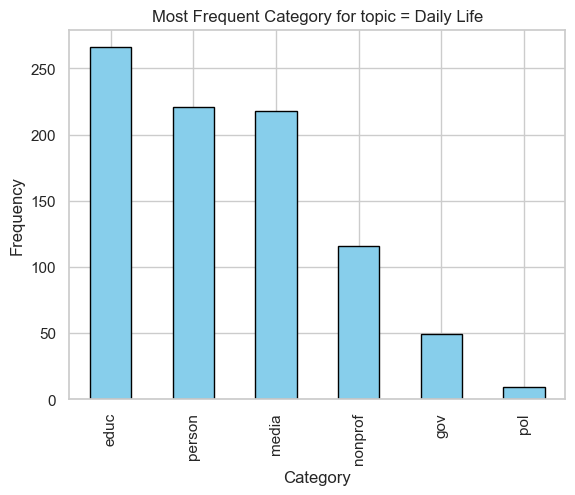

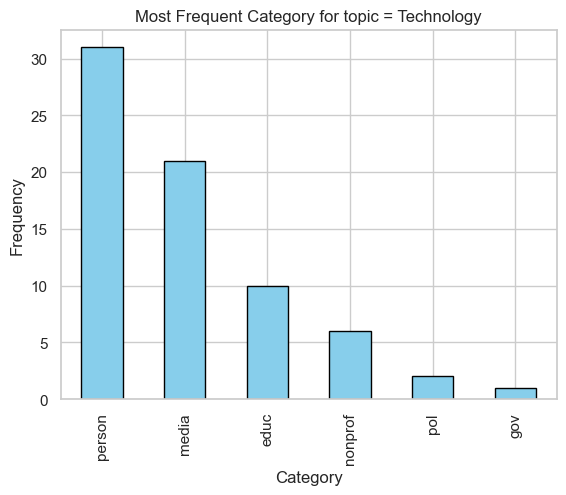

In [ ]:
# Group by 'k_means' and find the most frequent category and title in each group
most_frequent_info = df.groupby('k_means').agg({
    'category': lambda x: x.mode().iat[0],
    'k_means_titles': lambda x: x.mode().iat[0]
})

# Plot bar plots for each unique value of 'k_means'
for k_means_value, (most_frequent_cat, most_frequent_title) in most_frequent_info.iterrows():
    subset = df[df['k_means'] == k_means_value]

    # Plot the frequencies for the current 'k_means' value
    subset['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Most Frequent Category for topic = {most_frequent_title}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()

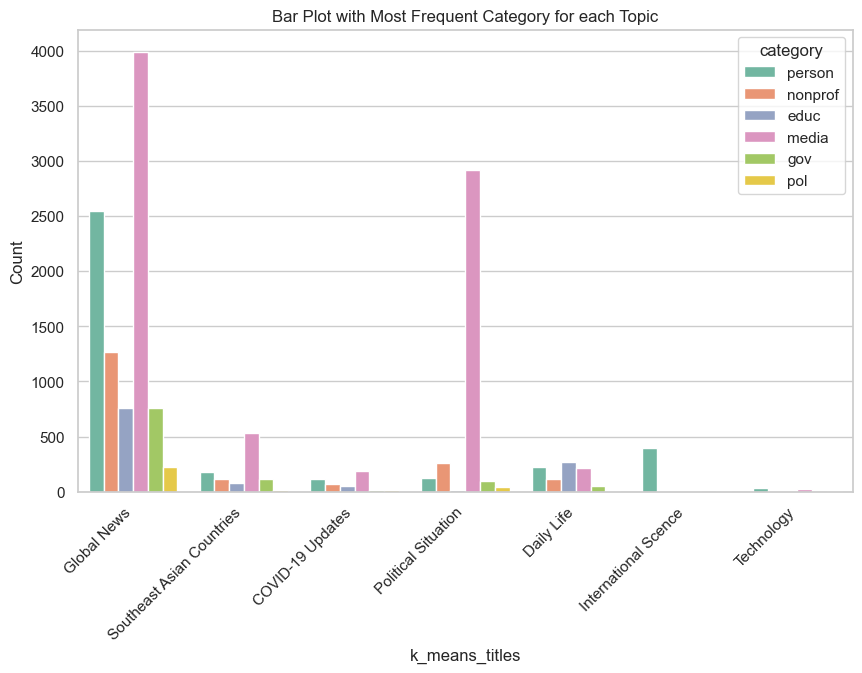

In [ ]:
# Find the most frequent category for each 'k_means_titles'
most_frequent_category = df.groupby('k_means_titles')['category'].agg(lambda x: x.mode().iat[0])

# Create a bar plot using seaborn with a custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(x='k_means_titles', hue='category', data=df, palette='Set2')  # Change 'Set2' to any other seaborn color palette

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the annotations for most frequent category
# for idx, (k_means_title, most_frequent_cat) in enumerate(most_frequent_category.items()):
#     plt.text(idx, 0, f'Most Frequent: {most_frequent_cat}', ha='center', va='bottom', color='red', fontsize=10)

plt.title('Bar Plot with Most Frequent Category for each Topic')
plt.xlabel('k_means_titles')
plt.ylabel('Count')

plt.show()


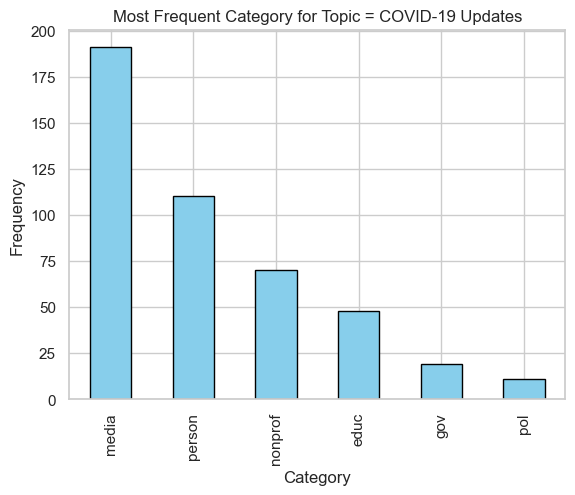

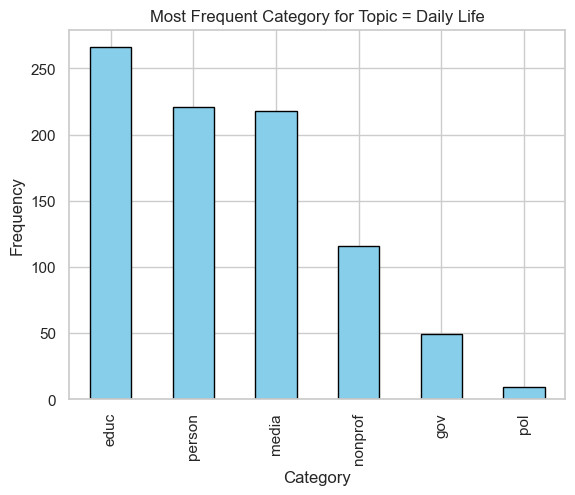

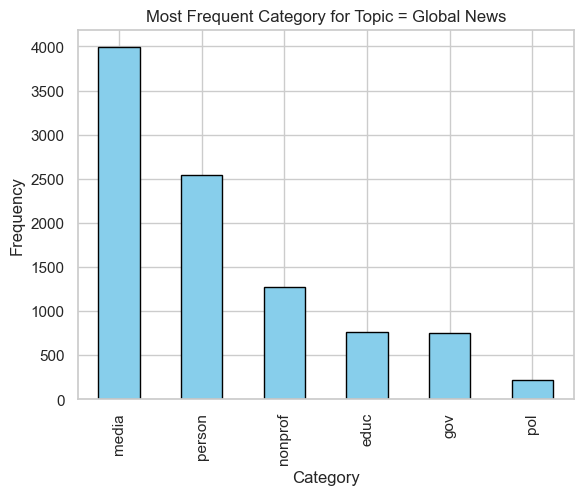

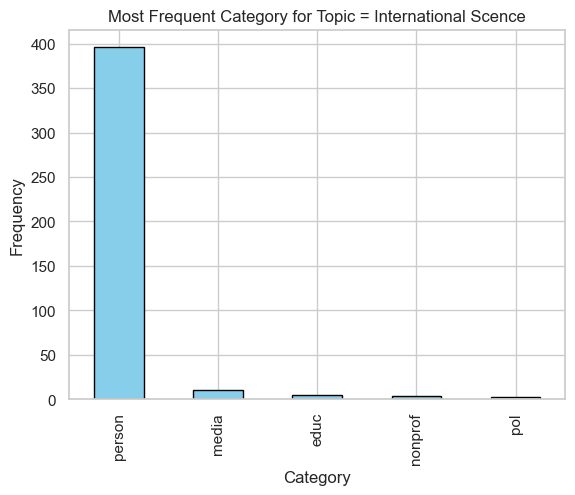

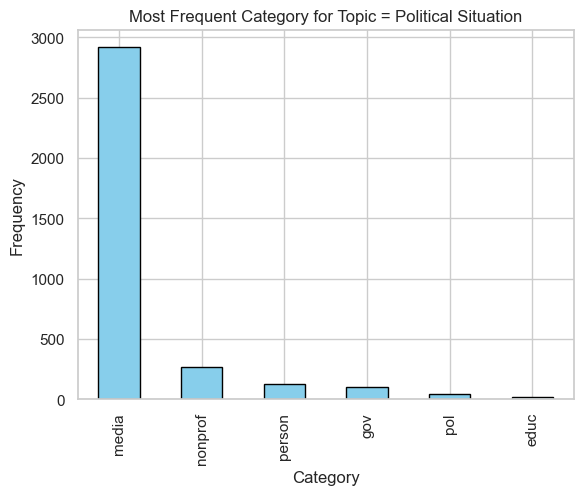

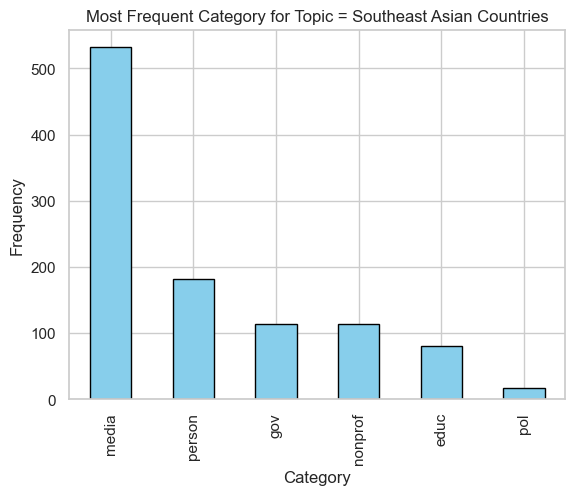

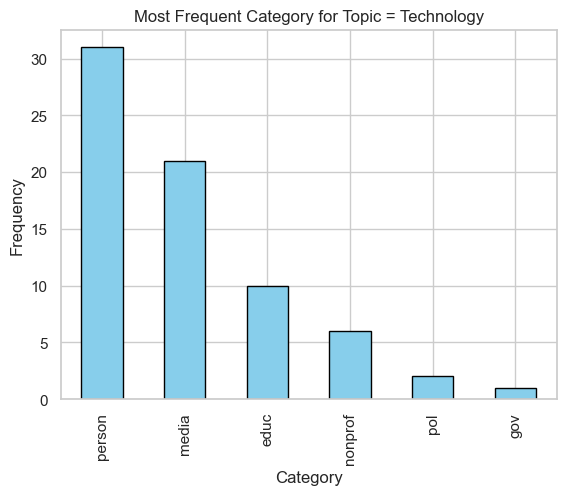

In [ ]:
# Group by 'k_means_title' and find the most frequent category in each group
most_frequent_category = df.groupby('k_means_titles')['category'].agg(lambda x: x.mode().iat[0])

# Plot bar plots for each unique value of 'k_means_title'
for k_means_title_value, most_frequent_cat in most_frequent_category.items():
    subset = df[df['k_means_titles'] == k_means_title_value]

    # Plot the frequencies for the current 'k_means_title' value
    subset['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Most Frequent Category for Topic = {k_means_title_value}')
    plt.xlabel('Category')
    plt.ylabel('Frequency')
    plt.show()

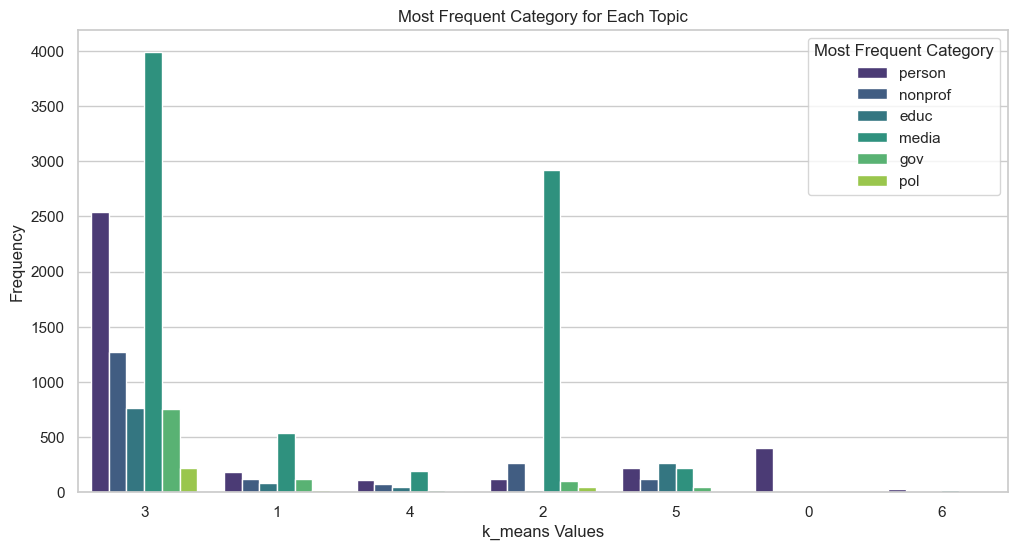

In [ ]:
# Group by 'k_means' and find the most frequent category in each group
most_frequent_category = df.groupby('k_means')['category'].agg(lambda x: x.mode().iat[0]).reset_index()

# Plot a grouped bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed

# Use seaborn to create a grouped bar plot
sns.countplot(x='k_means', hue='category', data=df, order=df['k_means'].unique(), palette='viridis', dodge=True)

plt.title('Most Frequent Category for Each Topic')
plt.xlabel('k_means Values')
plt.ylabel('Frequency')
plt.legend(title='Most Frequent Category', bbox_to_anchor=(1, 1))
plt.show()

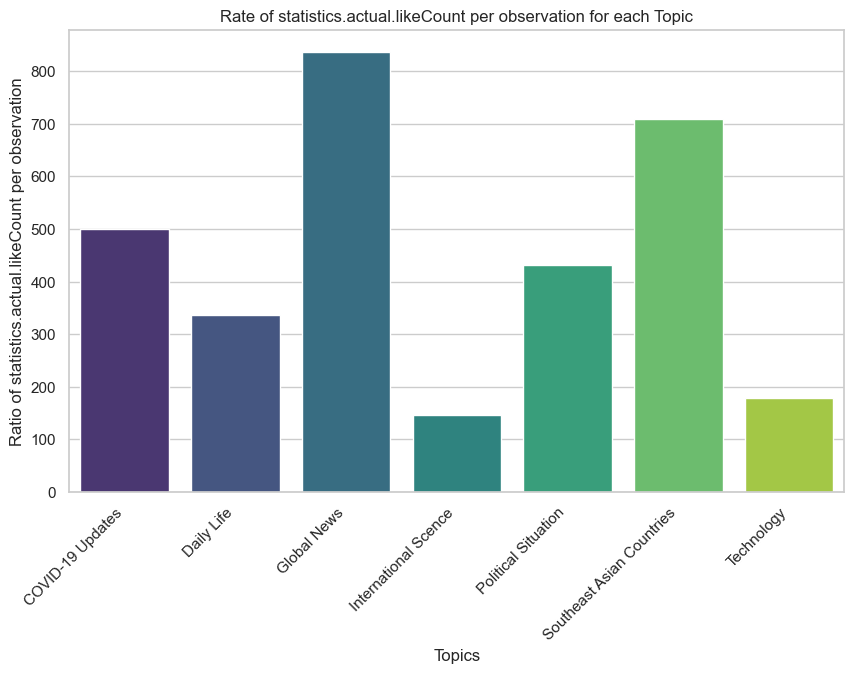

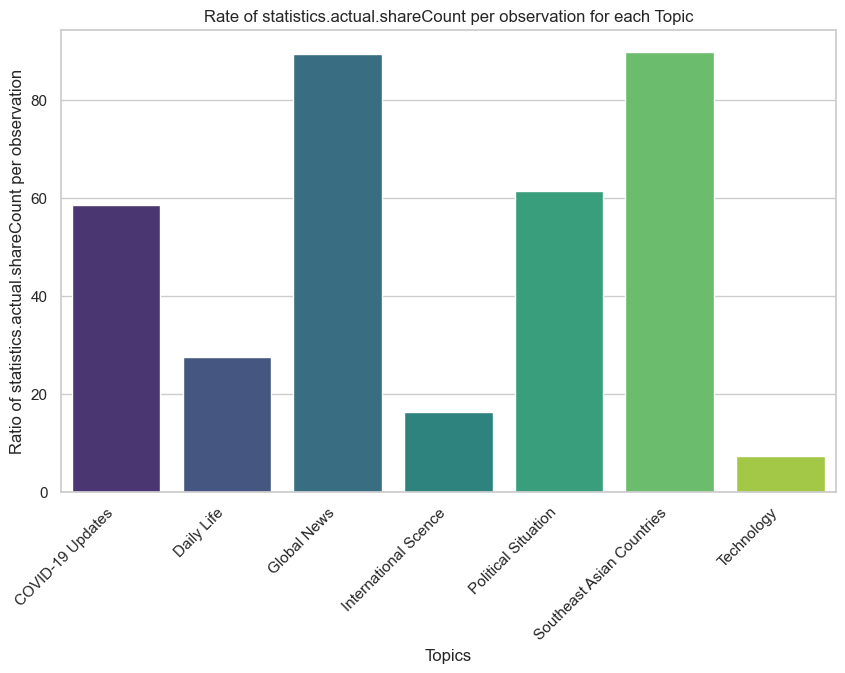

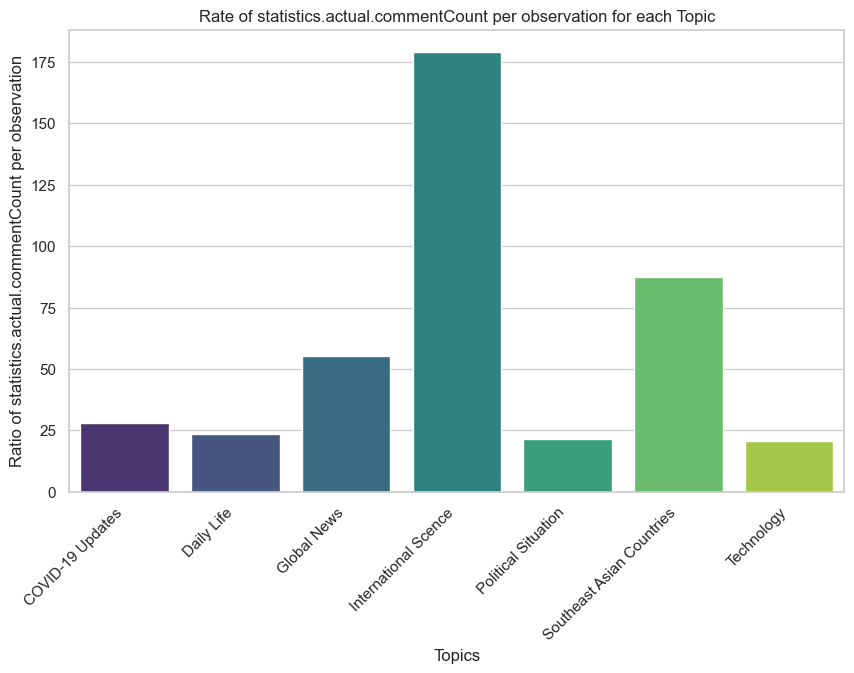

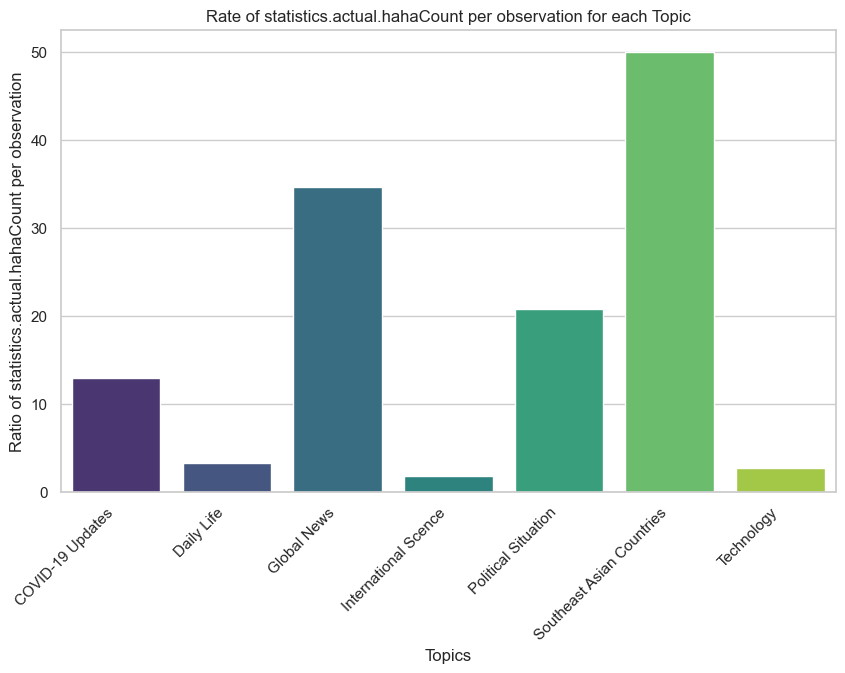

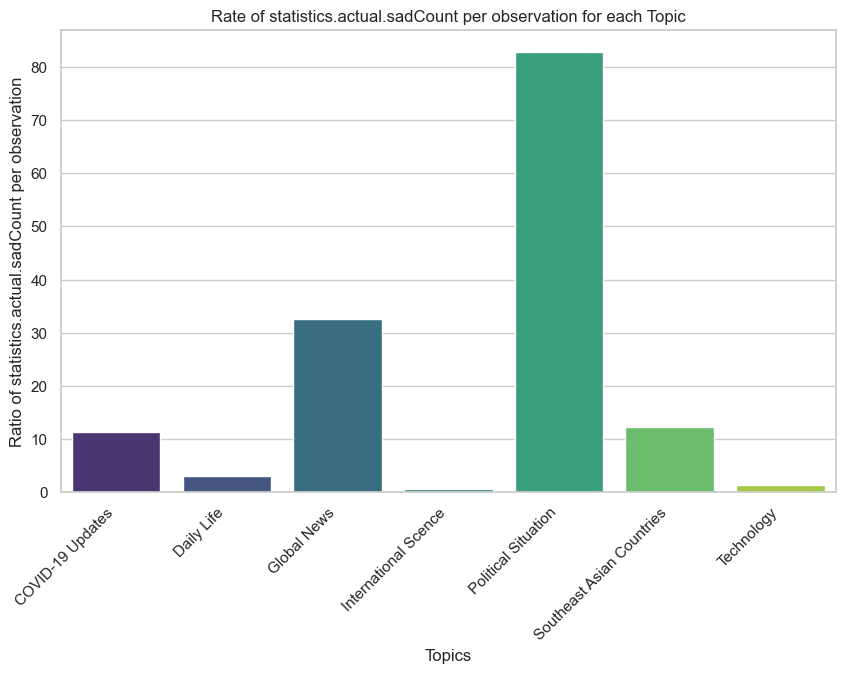

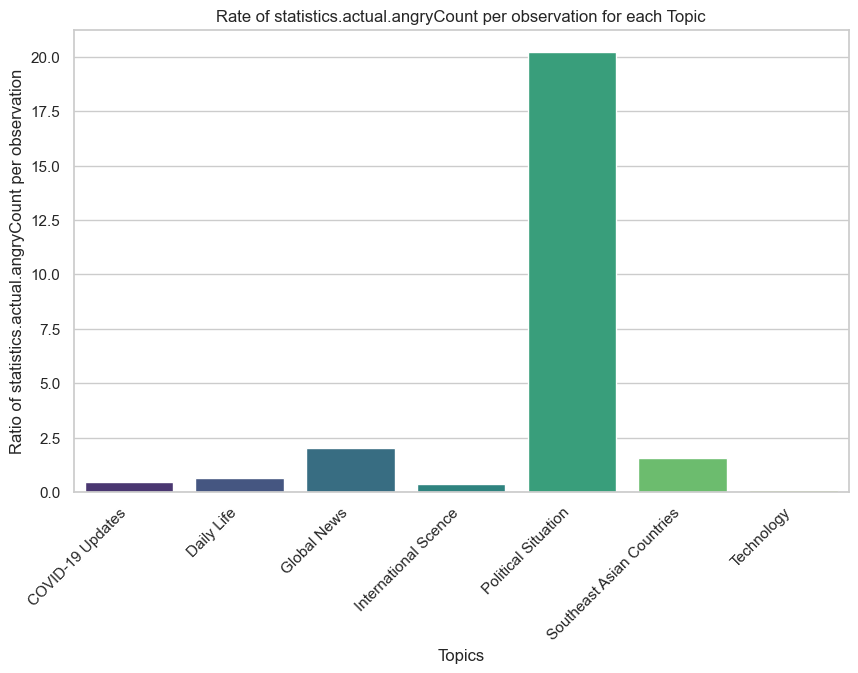

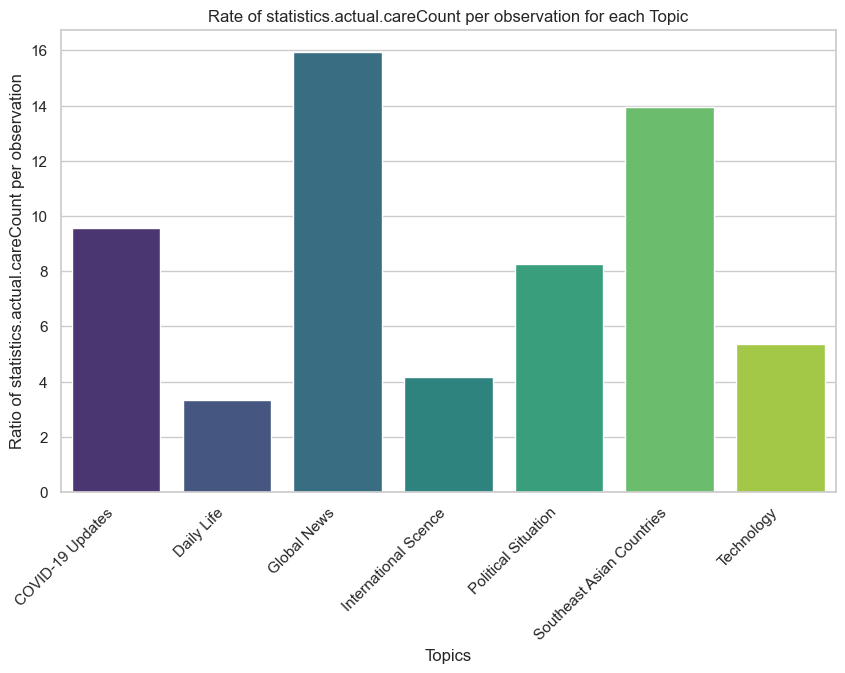

In [ ]:
# List of numerical variables
numerical_variables = ['statistics.actual.likeCount','statistics.actual.shareCount', 'statistics.actual.commentCount',
                        'statistics.actual.hahaCount', 'statistics.actual.sadCount',
                        'statistics.actual.angryCount', 'statistics.actual.careCount']

# Function to generate bar plot for a numerical variable
def generate_bar_plot(numerical_var):
    # Group by 'k_means_titles' and calculate the sum of the numerical variable and count of observations
    grouped_data = df.groupby('k_means_titles')[numerical_var].agg(['sum', 'count'])

    # Calculate the rate by dividing the total variable by the number of observations
    grouped_data['rate'] = grouped_data['sum'] / grouped_data['count']

    # Reset the index to make 'k_means_titles' a column
    grouped_data.reset_index(inplace=True)

    # Create a bar plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='k_means_titles', y='rate', data=grouped_data, palette='viridis')

    # Set labels and title
    plt.xlabel('Topics')
    plt.ylabel(f'Ratio of {numerical_var} per observation')
    plt.title(f'Rate of {numerical_var} per observation for each Topic')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

# Generate bar plots for each numerical variable
for numerical_var in numerical_variables:
    generate_bar_plot(numerical_var)


## Facebook Metrics Analysis

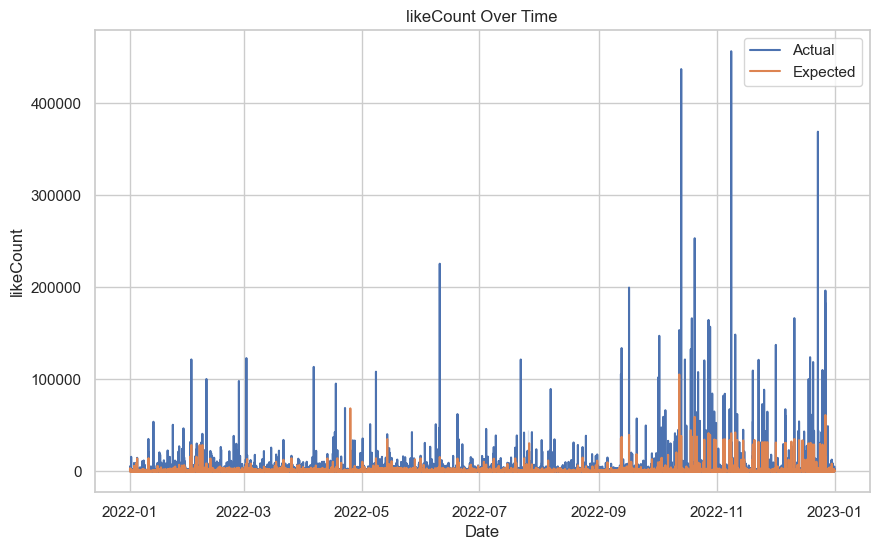

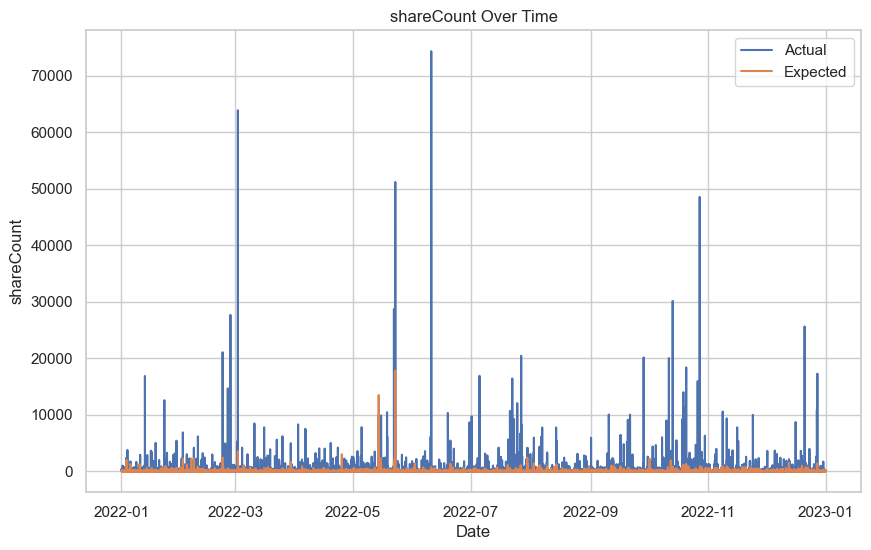

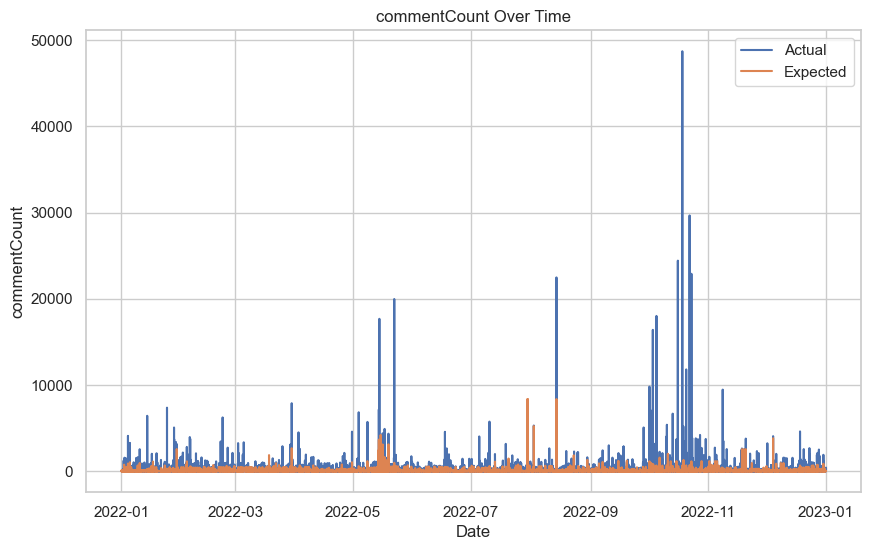

In [ ]:
df['date'] = pd.to_datetime(df['date'])

engagement_metrics = ['likeCount', 'shareCount', 'commentCount']

for metric in engagement_metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y=f'statistics.actual.{metric}', data=df, label='Actual')
    sns.lineplot(x='date', y=f'statistics.expected.{metric}', data=df, label='Expected')
    plt.title(f'{metric} Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

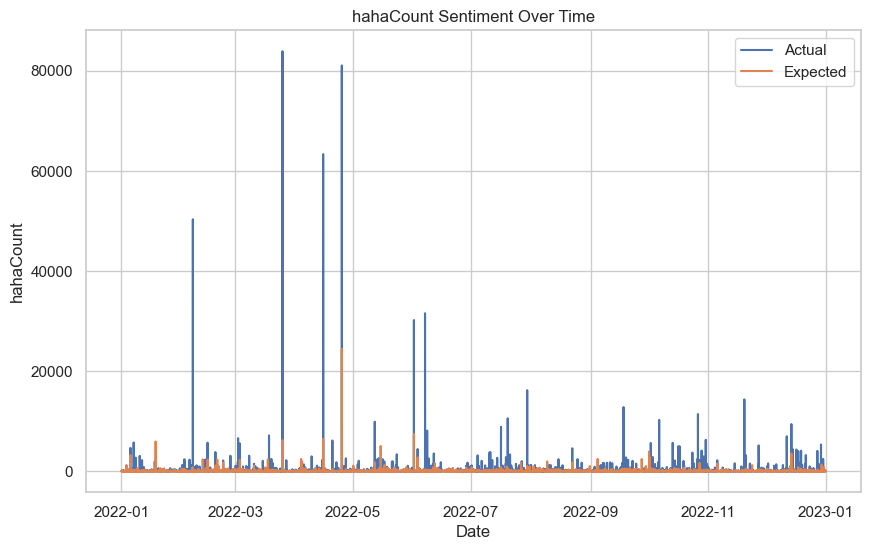

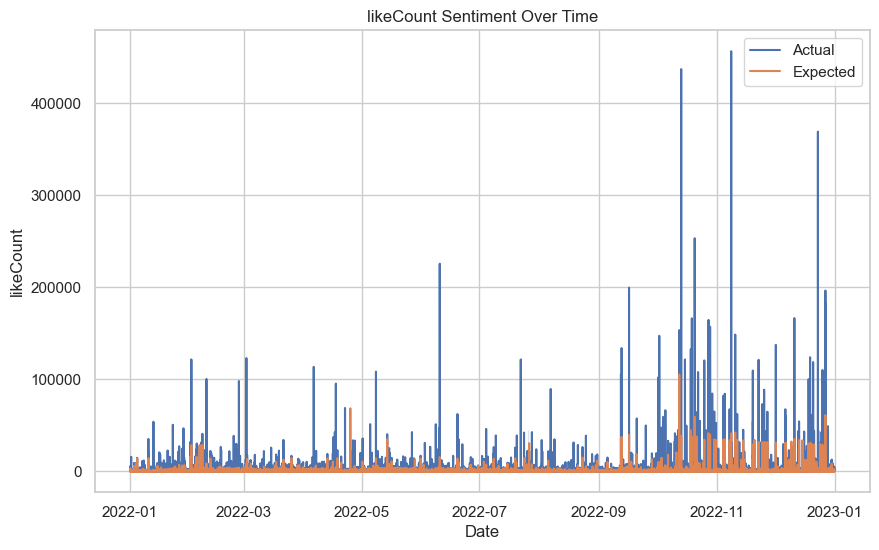

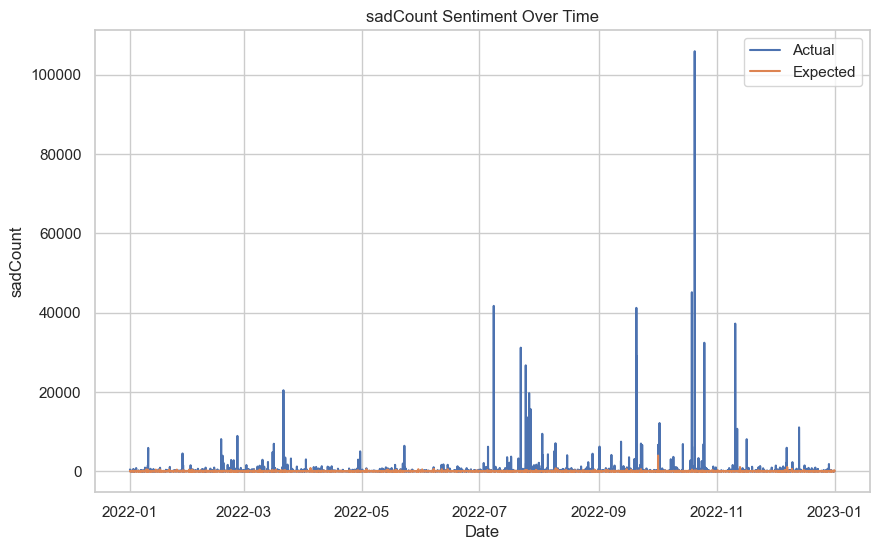

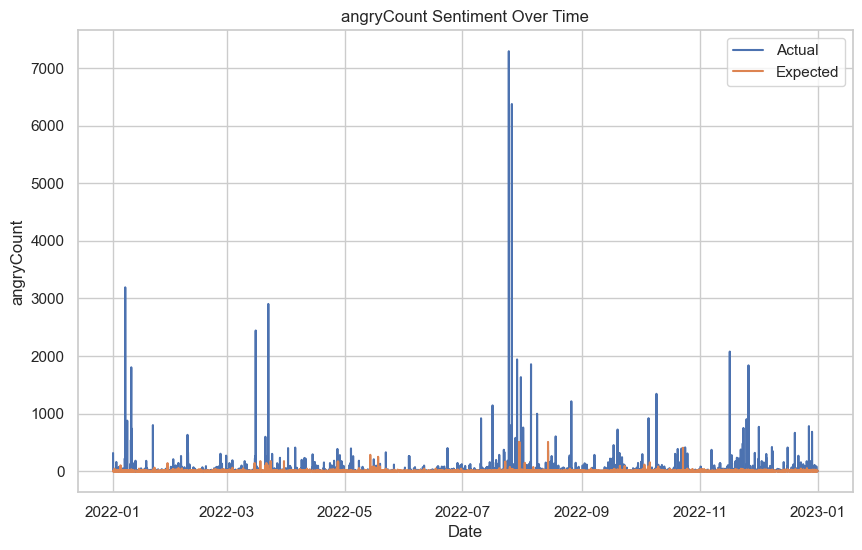

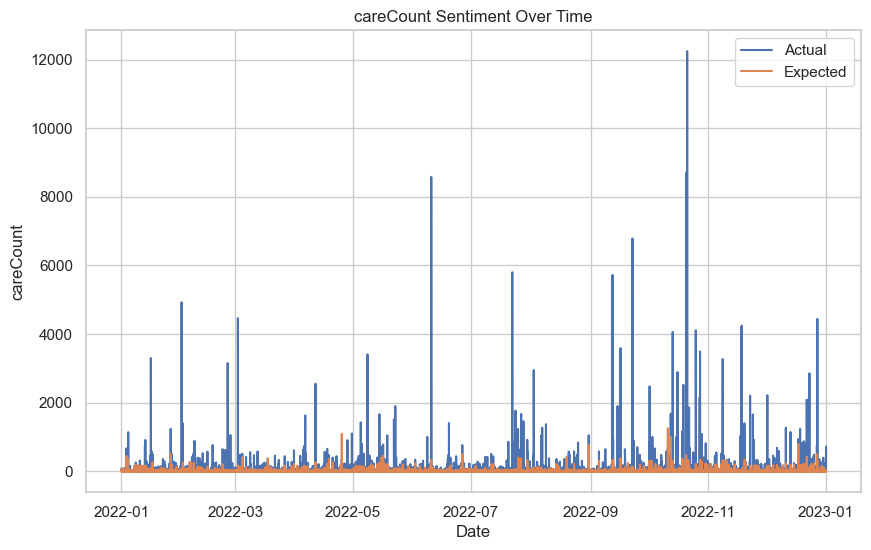

In [ ]:
sentiment_metrics = ['hahaCount', 'likeCount', 'sadCount', 'angryCount', 'careCount']

for metric in sentiment_metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y=f'statistics.actual.{metric}', data=df, label='Actual')
    sns.lineplot(x='date', y=f'statistics.expected.{metric}', data=df, label='Expected')
    plt.title(f'{metric} Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

### Comparative Analysis - Likes, Shares, and Comments

/var/folders/j8/qq358xrs1pd71q167r63w1zc0000gn/T/ipykernel_28916/2340596342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparative_df['likeDifference'] = comparative_df['statistics.actual.likeCount'] - comparative_df['statistics.expected.likeCount']
/var/folders/j8/qq358xrs1pd71q167r63w1zc0000gn/T/ipykernel_28916/2340596342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparative_df['shareDifference'] = comparative_df['statistics.actual.shareCount'] - comparative_df['statistics.expected.shar

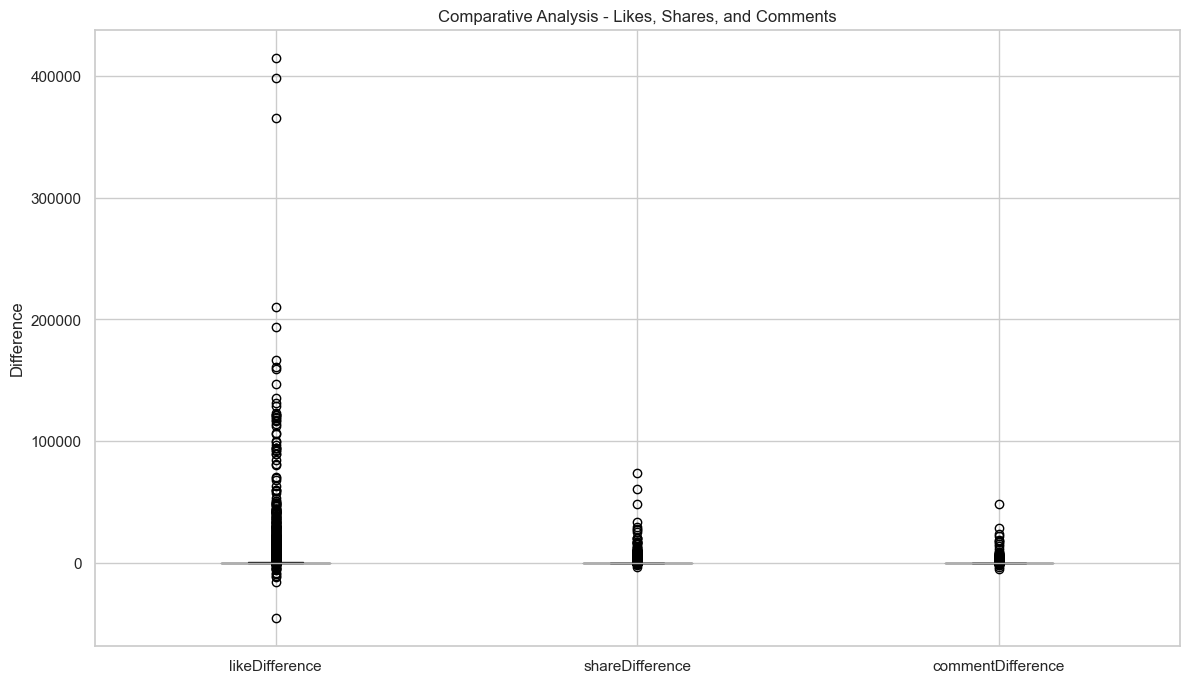

In [ ]:
comparative_df = df[['statistics.actual.likeCount', 'statistics.expected.likeCount',
                     'statistics.actual.shareCount', 'statistics.expected.shareCount',
                     'statistics.actual.commentCount', 'statistics.expected.commentCount']]

comparative_df['likeDifference'] = comparative_df['statistics.actual.likeCount'] - comparative_df['statistics.expected.likeCount']
comparative_df['shareDifference'] = comparative_df['statistics.actual.shareCount'] - comparative_df['statistics.expected.shareCount']
comparative_df['commentDifference'] = comparative_df['statistics.actual.commentCount'] - comparative_df['statistics.expected.commentCount']

plt.figure(figsize=(14, 8))

comparative_df[['likeDifference', 'shareDifference', 'commentDifference']].boxplot()
plt.title('Comparative Analysis - Likes, Shares, and Comments')
plt.ylabel('Difference')
plt.show()

### User Interaction Patterns

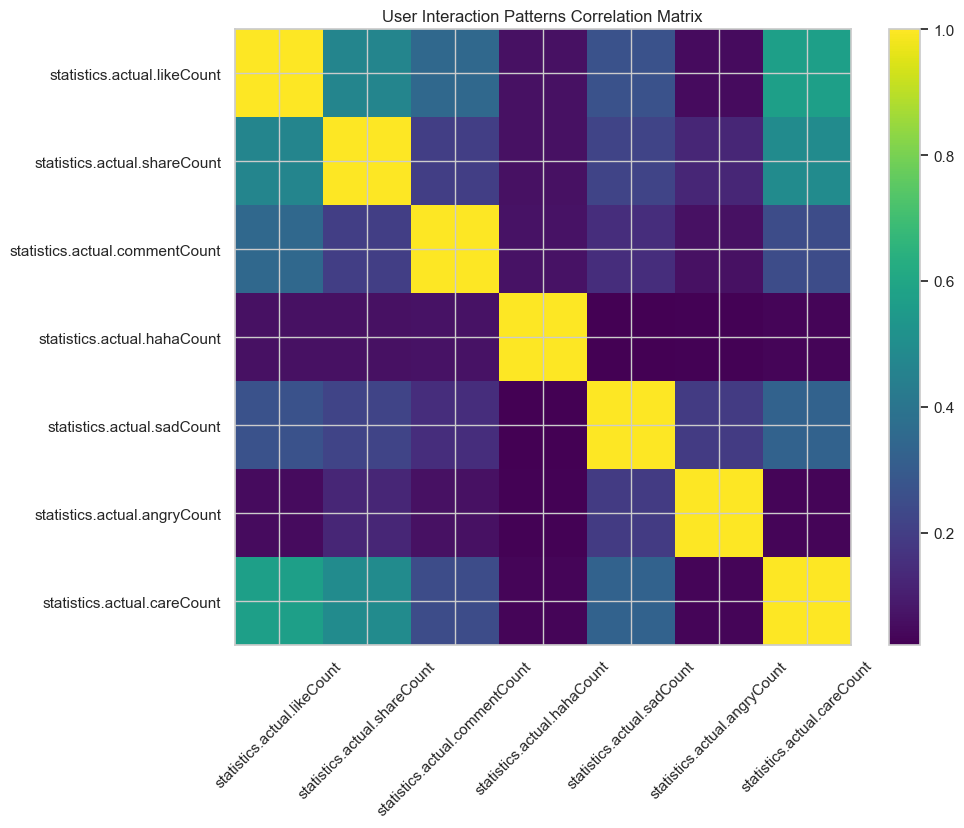

In [ ]:
interaction_df = df[['statistics.actual.likeCount', 'statistics.actual.shareCount', 'statistics.actual.commentCount',
                      'statistics.actual.hahaCount', 'statistics.actual.sadCount', 'statistics.actual.angryCount', 'statistics.actual.careCount']]

correlation_matrix = interaction_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.title('User Interaction Patterns Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(interaction_df.columns)), interaction_df.columns, rotation=45)
plt.yticks(range(len(interaction_df.columns)), interaction_df.columns)
plt.show()
